# <b>Seoul Bike Sharing Demand Prediction</b>

## **<u>Project Summary<u>**

This Seoul Bike Sharing Demand Prediction machine learning project aims to predict demand for bike-sharing based on historical data. The dataset used contains data from a bike-sharing system including the date, hour, weather conditions, temperature, and the number of bikes rented.

The project aims to use this data to build a predictive model that can accurately estimate bike rental demand for any given hour. The model will be evaluated on its accuracy in predicting the number of bikes rented during a given hour.

The data set included Rental bike information. As part of the analysis, descriptive statistics were calculated for each variable, and visualizations were created to explore the relationships between various variables. To get insight from the dataset, we built a variety of charts, including a count plot, bar plot, line plot, heatmap, and boxplot.

Dataset for rented bikes with 8760 observations and 14 variables. These include Date, Rented Bike Count, Hour, Temperature (°C), Humidity (%), Wind speed (m/s, Visibility (10m), Dew point temperature, Solar Radiation, Rainfall (mm), Snowfall (cm), Seasons, Holiday, and Functioning Day. The parse_date() method was used to transform the feature date from its original object form to datetime64.

There are no duplicate values in the dataset. Additionally, there are no null or missing values in the dataset. 3 variables in the dataset Seasons, Holidays, and Functional Day are categorical variables, however, the remaining 11 variables are all of a numerical character. The Outliers found for Rented Bike Count, Wind speed (m/s), Solar Radiation (MJ/m2), Rainfall (mm), and Snowfall (cm). The columns labeled "Rainfall (mm)" and "Snowfall (cm)" are ommitted because of their flat interquartile ranges. We eliminated outliers from Rented Bike Count, Wind speed (m/s), and  Solar Radiation (MJ/m2) by using the interquartile range.

We delete the original Date variable from the dataset and replace it with new variables that include the day, month, and year that we extracted from the Date variable. The dataset is now prepared for analysis.

After doing univariate, bivariate, and multivariate analyses, we discovered insights which are following :
- Customers favor rental motorcycles equally in all seasons.
- When there are no holidays, customers choose to rent motorcycles. Customers hardly ever use the bikes they rent while travelling on holiday.
- Nearly all consumers preferred to rent bikes during functional hours.
- Bike rentals are popular all month long.
- Renting bicycles was not very popular in 2017, but it increased in 2018.
- At night, customers do not prefer to use rented bikes.
- Customers do not prefer rented bikes in the mornings 4 and 5, but from 7, 8, and 9, the use of rented bikes increases, possibly due to working people going to the office, and it is the same in the evenings 5, 6, and 7, because people are travelling from the office to home. Overall, the rented bike was the most frequently used during office in and out times.
- Customers mostly use rented bikes for transportation in the evening.
- Customers who travel most commonly use rented bikes in the morning at 8 a.m. and in the evening at 6 p.m.
- When the humidity level is between 10% and 18%, people prefer to rent bikes.
- Renting a bike is the best option for customers in dew point temperatures ranging from 12°C to 18°C. The use of a rented bike increases with increasing dew point temperatures, but it still reaches normal dew point temperatures.
- According to the graph, solar radiation has no effect on customer use of rented bikes.
- When it's not raining, people prefer rental bikes the most.
- When there is no snowfall, most people opt to rent bikes. However, the majority of customers prefer to rent bikes when it snows up to 4 cm.
- In the first 10 days of the month, most rented bikes are used by customers. Customers consistently use rented bikes in the last 15 days of the month.
- In June, most rented bikes are used through the year, followed by October. Customers' use of rent bikes is at its peak from April to September.
- The count of rented bikes on that day is unaffected by the day's visibility, but when visibility exceeds 1750, use of rented bikes increases more than usual.
- During the summer and autumn seasons, most people rent bikes. During the winter, fewer people choose to rent bikes.
- Even when there is no holiday other than a holiday, people rent bikes. The use of rented bikes on holidays is lower than on non-holiday days.
- Almost every rented bike is used during its functional hours.


We also verified the presumptions of the regression machine learning model. We restore the distribution of the features Rented Bike Count, Wind speed (m/s), Solar Radiation (MJ/m2), Visibility (10 m), Rainfall (mm), and Snowfall (cm) to normal using log and square root transformation. We also check to see if there is a linear relationship between the independent and dependent variables.

Furthermore, we use a heatmap and the variance inflation factor to examine multicollinearity in independent variables (VIF). Due to their high VIFs, we eliminated the variables year, dew point temperature (°C), and humidity (%). Once categorical variables like seasons, holidays, and working days were encoded, our dataset was ready to be used with a machine-learning model.

To make it easier for a model to learn and understand the problem, we divided the dataset into dependent and independent features and scaled them to the same length. Then we implement machine learning models like linear regression, Lasso (L1), Ridge (L2), ElasticNet, Decision Tree regressors, Random Forest, and XGBoost regression. We obtained a high accuracy of 0.9026 and a low root mean squared error of 3.80 from the XGBoost model, become final optimal model for prediction.

The Functioning Days, Rainfall (mm), and Seasons variables have a significant influence on the XBoost model, according to our plot of feature significance. Additionally, we explain our XGBoost model using SHAP.



## **<u>Problem Statement</u>**

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


.

## <b><u>Data Description</u></b>

#### The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


### <b>Attribute Information: </b>

* #### Date : year-month-day
* #### Rented Bike count - Count of bikes rented at each hour
* #### Hour - Hour of the day
* #### Temperature-Temperature in Celsius
* #### Humidity - %
* #### Windspeed - m/s
* #### Visibility - 10m
* #### Dew point temperature - Celsius
* #### Solar radiation - MJ/m2
* #### Rainfall - mm
* #### Snowfall - cm
* #### Seasons - Winter, Spring, Summer, Autumn
* #### Holiday - Holiday/No holiday
* #### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

.

In [ ]:
#Importing Necessary dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.stats import norm
from tabulate import tabulate
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn import metrics
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

import graphviz
from sklearn.tree import export_graphviz
sns.set_style('darkgrid')

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading Dataset
import pandas as pd

# Replace 'raw.githubusercontent.com' with 'github.com' in the URL
github_csv_url = 'https://raw.githubusercontent.com/SayakKDutta1/Hourly-Bike-Rental-Demand-Forecasting/main/SeoulBikeData.csv'

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv(github_csv_url, encoding="ISO-8859-1")

In [ ]:
# First five observations
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
# Last five observations
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

## **<u>Data Inspection<u>**

In [ ]:
# Checking shape of the dataset
df.shape

(8760, 14)

Dataset having 8760 observations and 14 features

In [ ]:
# Checking columns name of dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In the dataset, there are object, float64, and int64 detype features present.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

'Date' coverted to datetime64 from object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
# Basic description of Dataset
df.describe()

Date  Rented Bike Count         Hour  \
count                           8760        8760.000000  8760.000000   
mean   2018-05-31 23:59:59.999999744         704.602055    11.500000   
min              2017-12-01 00:00:00           0.000000     0.000000   
25%              2018-03-02 00:00:00         191.000000     5.750000   
50%              2018-06-01 00:00:00         504.500000    11.500000   
75%              2018-08-31 00:00:00        1065.250000    17.250000   
max              2018-11-30 00:00:00        3556.000000    23.000000   
std                              NaN         644.997468     6.922582   

       Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count      8760.000000  8760.000000       8760.000000       8760.000000   
mean         12.882922    58.226256          1.724909       1436.825799   
min         -17.800000     0.000000          0.000000         27.000000   
25%           3.500000    42.000000          0.900000        940.000000   
50%          13.700000    57.000000          1.500000       1698.000000   
75%          22.500000    74.000000          2.300000       2000.000000   
max          39.400000    98.000000          7.400000       2000.000000   
std          11.944825    20.362413          1.036300        608.298712   

       Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                8760.000000              8760.000000   8760.000000   
mean                    4.073813                 0.569111      0.148687   
min                   -30.600000                 0.000000      0.000000   
25%                    -4.700000                 0.000000      0.000000   
50%                     5.100000                 0.010000      0.000000   
75%                    14.800000                 0.930000      0.000000   
max                    27.200000                 3.520000     35.000000   
std                    13.060369                 0.868746      1.128193   

       Snowfall (cm)  
count    8760.000000  
mean        0.075068  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         8.800000  
std         0.436746

## **<u>Handling Duplicate Values<u>**

In [ ]:
# Checking for number of duplicated values
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


## **<u>Handling Null / Missing Values<u>**

In [ ]:
# Checking for number of null values
count_null=pd.DataFrame(df.isna().sum()).rename(columns={0:'number_of_nulls_values'})
count_null

number_of_nulls_values
Date                                            0
Rented Bike Count                               0
Hour                                            0
Temperature(°C)                                 0
Humidity(%)                                     0
Wind speed (m/s)                                0
Visibility (10m)                                0
Dew point temperature(°C)                       0
Solar Radiation (MJ/m2)                         0
Rainfall(mm)                                    0
Snowfall (cm)                                   0
Seasons                                         0
Holiday                                         0
Functioning Day                                 0

Dataset having 0 null values.

## **<u>Handling Outliers<u>**

#### **Categorical variables**

In [ ]:
# Find categorical variables
categorical_variables = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical_variables)))
print(categorical_variables)

There are 3 categorical variables
['Seasons', 'Holiday', 'Functioning Day']


In [ ]:
# Checking number of categories in each categorical variables
categorical_variables_df=df[categorical_variables]
for i in categorical_variables_df.columns:
    print(categorical_variables_df[i].value_counts())
    print('--'*50)

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Functioning Day
Yes    8465
No      295
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


There are three categorical variables: "Seasons," "Holidays," and "Functioning Day."

#### **Numerical variables**

In [ ]:
# Finding numerical variables
numerical_variables=[var for var in df.columns if var not in categorical_variables]
print('There are {} numerical variables'.format(len(numerical_variables)))
print('--'*50)
print(numerical_variables)

There are 11 numerical variables
----------------------------------------------------------------------------------------------------
['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


In [ ]:
numerical_variables_df = df[numerical_variables]

Date, Rented Bike Count, Hour, Temperature (°C),Humidity (%), Wind speed (m/s), Visibility (10 m), Dew point temperature (°C), Solar Radiation (MJ/m2),Rainfall (mm) and Snowfall (cm) are total 11 numerical variables.

____________________________________________________________________________________________________


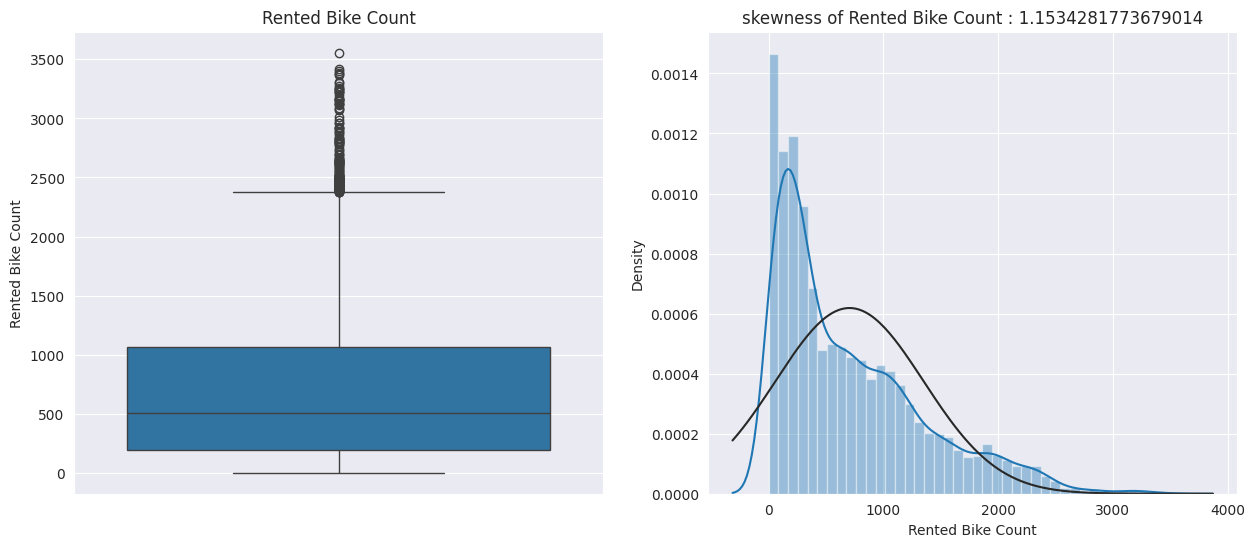

____________________________________________________________________________________________________


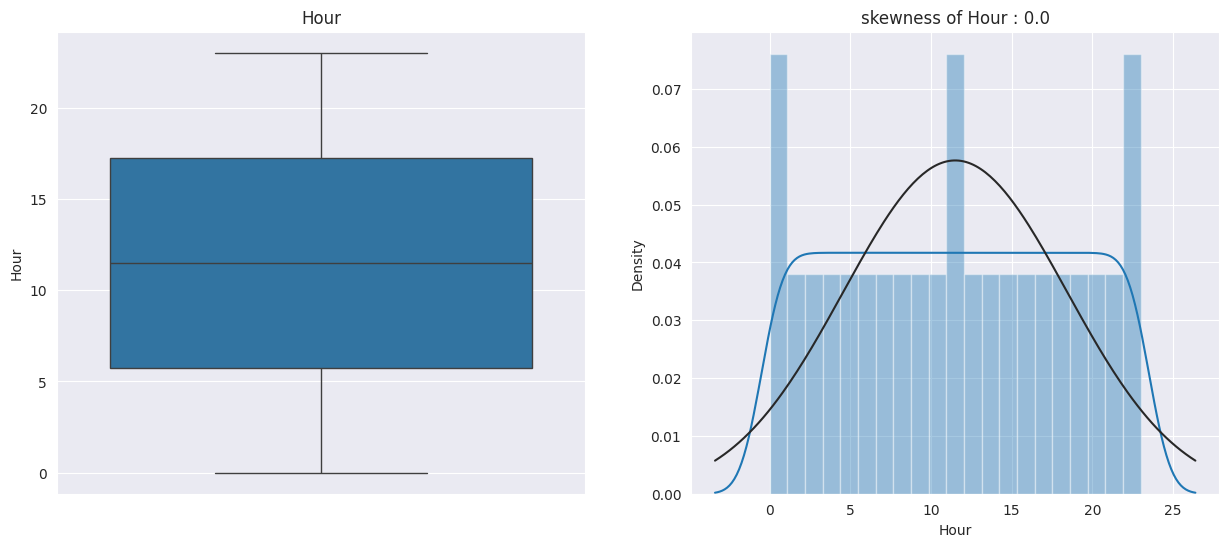

____________________________________________________________________________________________________


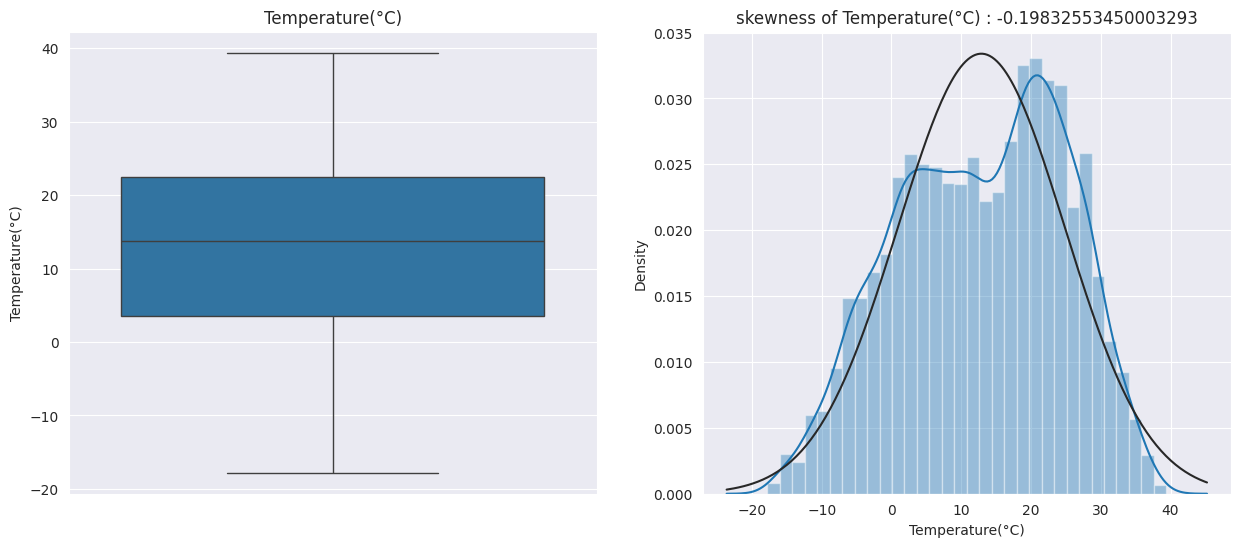

____________________________________________________________________________________________________


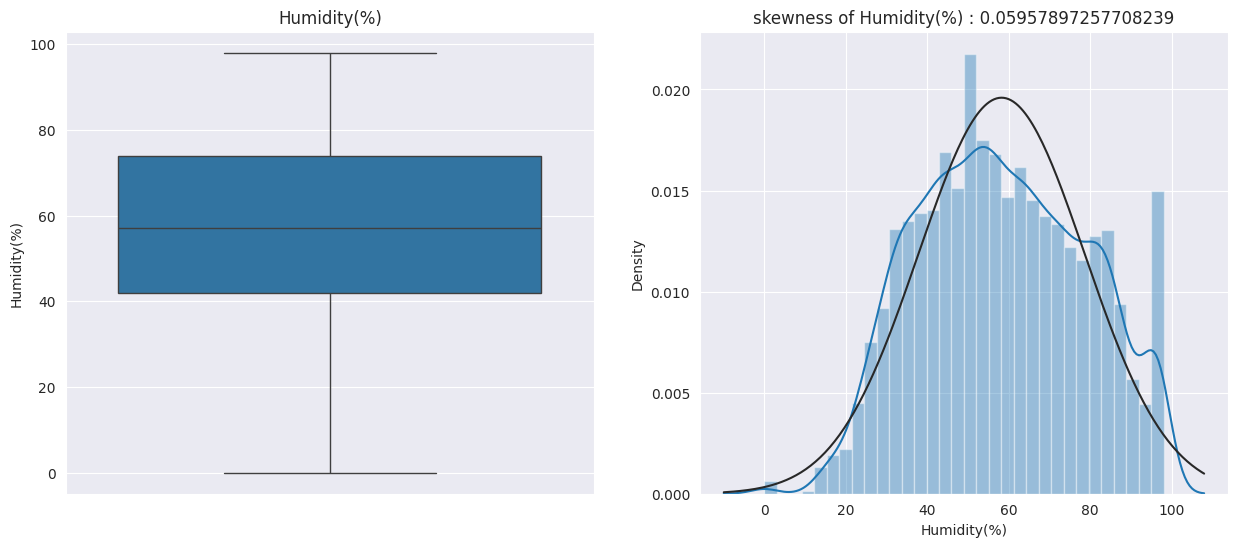

____________________________________________________________________________________________________


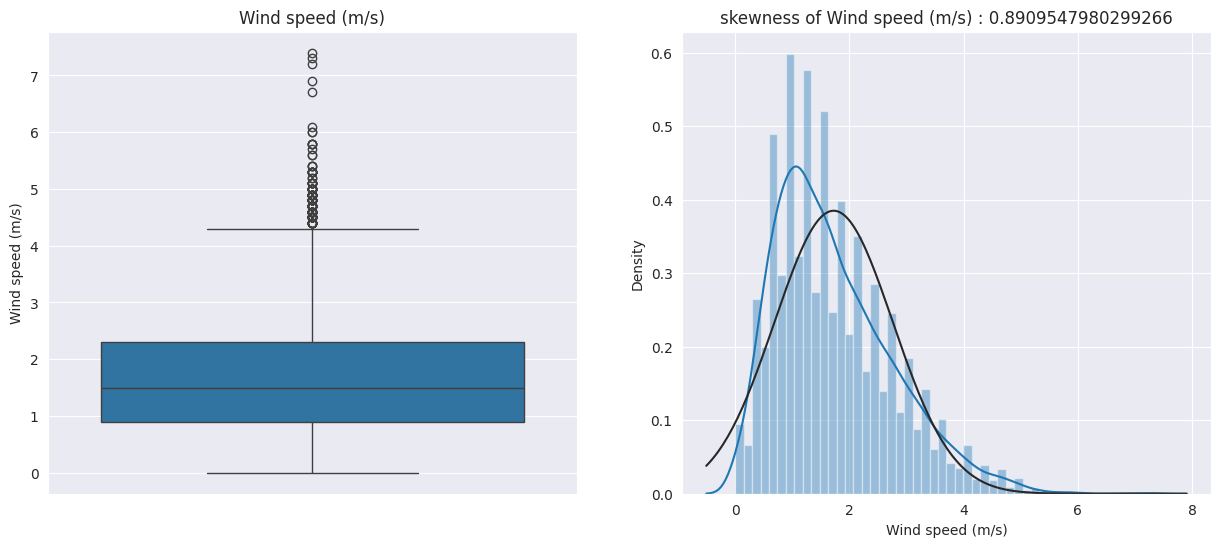

____________________________________________________________________________________________________


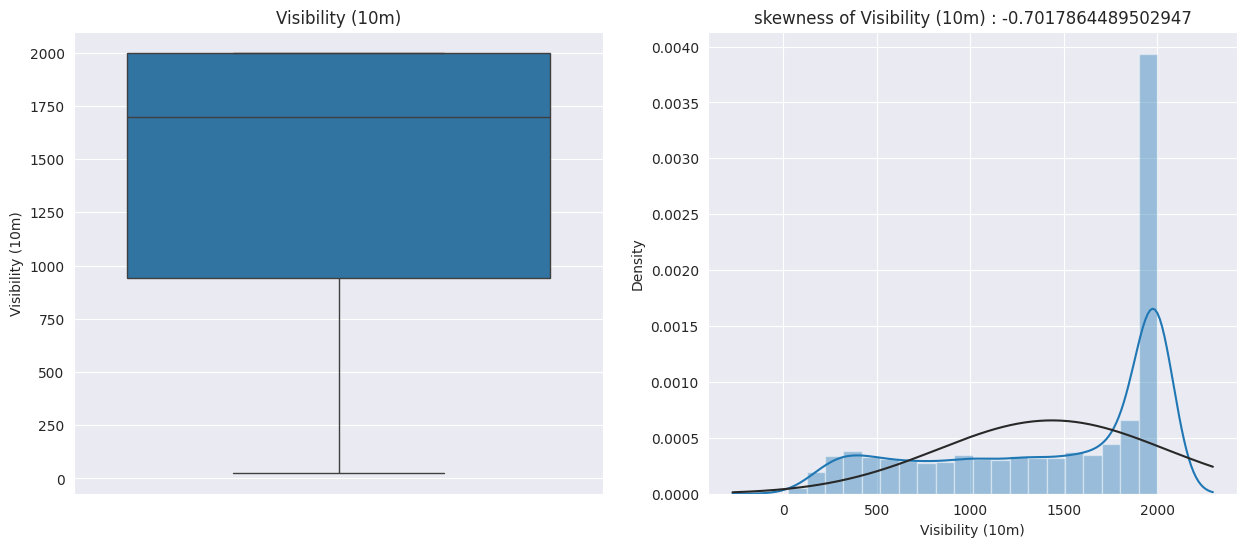

____________________________________________________________________________________________________


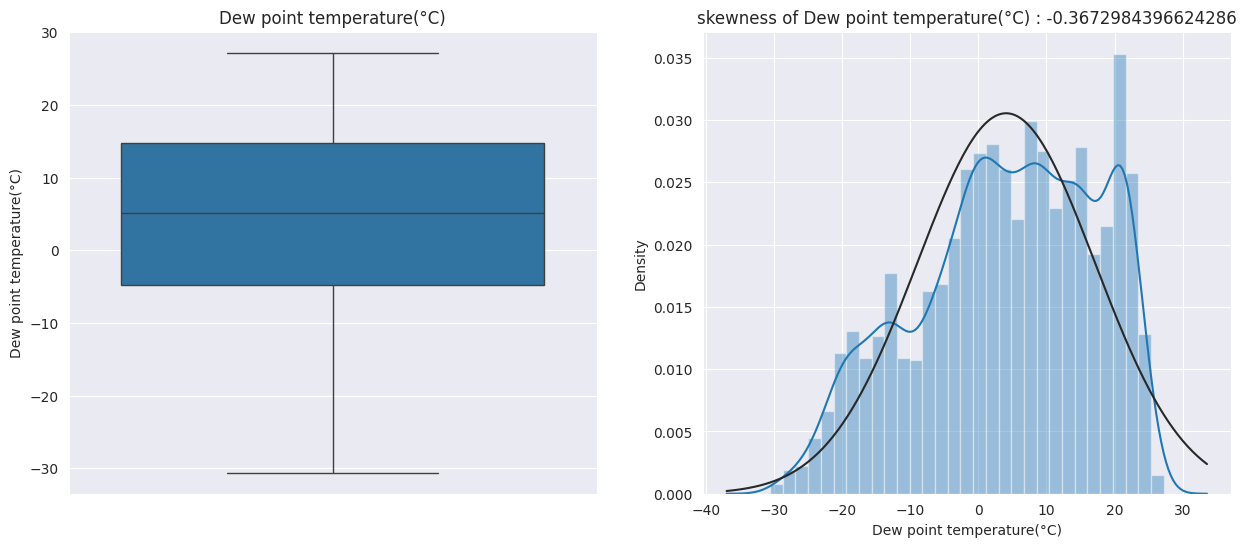

____________________________________________________________________________________________________


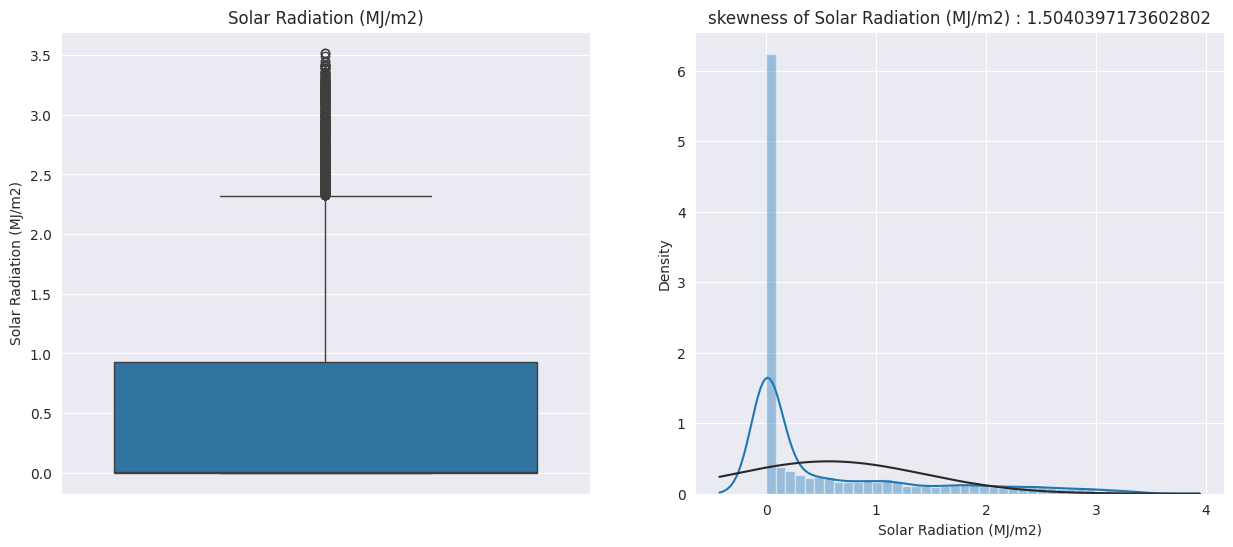

____________________________________________________________________________________________________


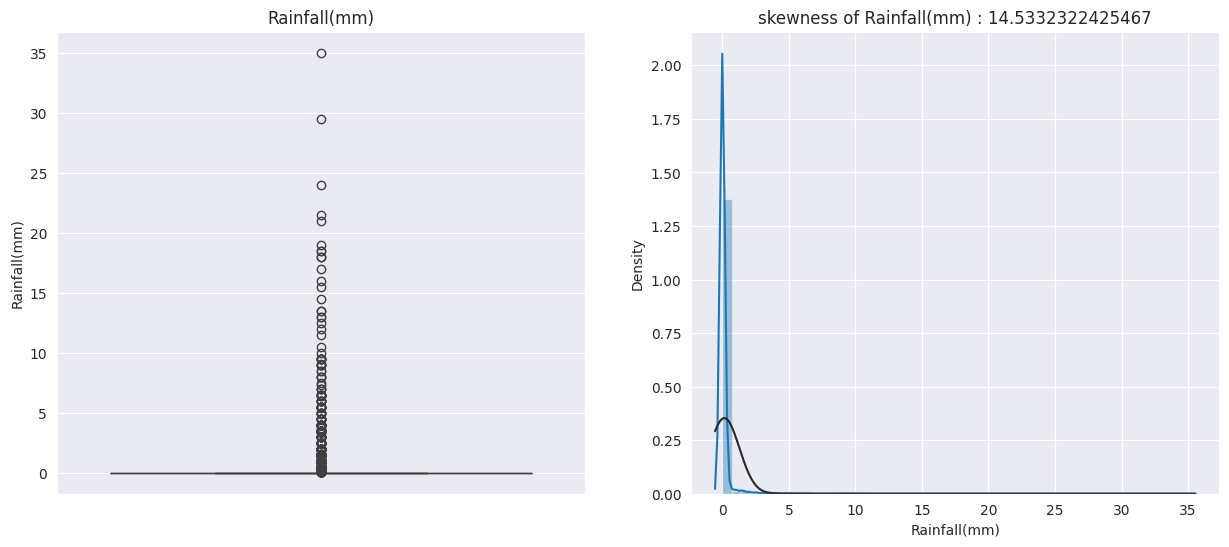

____________________________________________________________________________________________________


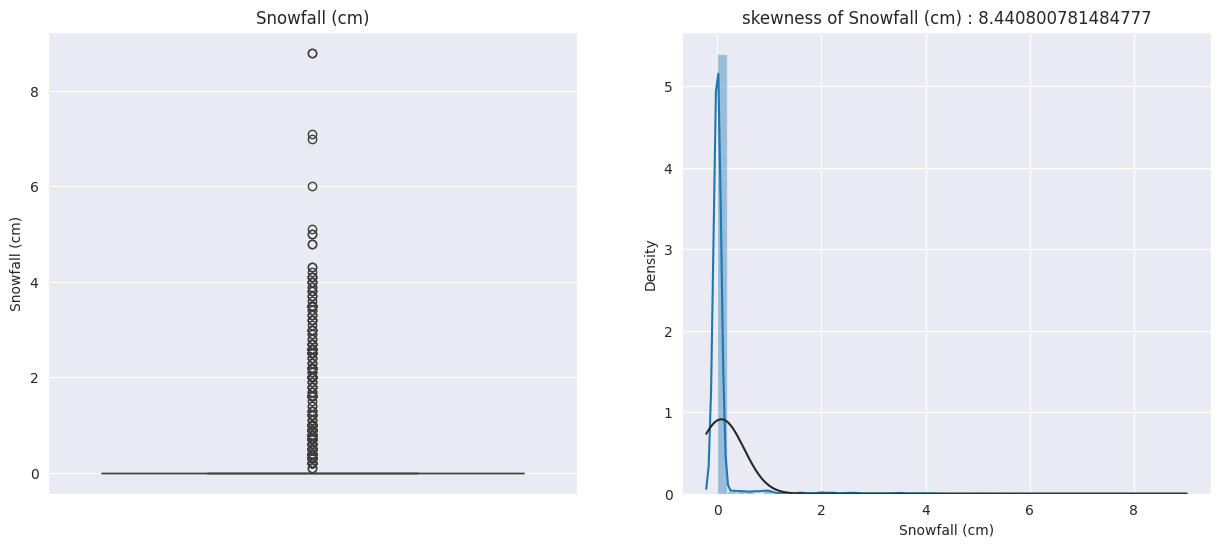

In [ ]:
# Checking for outliers in numerical variables using boxplot
from scipy.stats import norm

# Removing "Date" variable from numerical variable
num_var=[var for var in numerical_variables_df.columns if var not in ["Date"]]

# Plotting Box and Distribution plot
for var in num_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*50)
    plt.show()

The variables Rented Bike Count, Wind speed (m/s), Solar Radiation (MJ/m2), Rainfall (mm) and Snowfall (cm) have outliers.

In [ ]:
# Using Inter Quartile Range for removing outliers from numerical variables

# Defining outlier features
outlier_var=['Rented Bike Count', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)' ]

# Capping dataset
for i in outlier_var:
    # Findling IQR
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1

    # Defining upper and lower limit
    lower_limit =df[i].quantile(0.25)-1.5*IQR
    upper_limit =df[i].quantile(0.75)+1.5*IQR

    # Applying lower and upper limit to each variables
    df.loc[(df[i] > upper_limit),i] = upper_limit
    df.loc[(df[i] < lower_limit),i] = lower_limit

____________________________________________________________________________________________________


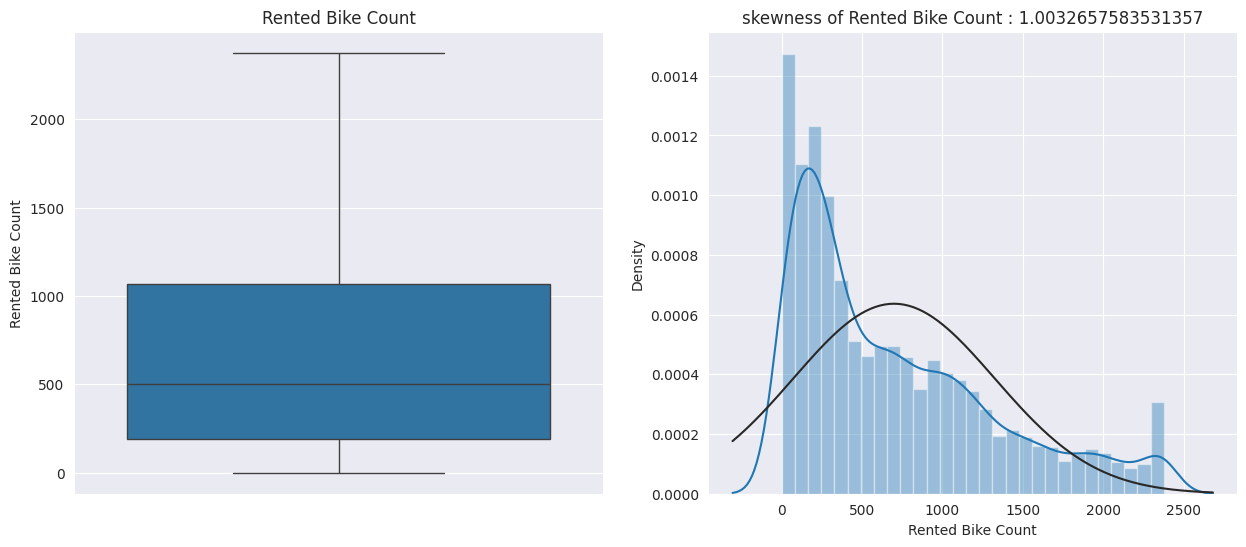

____________________________________________________________________________________________________


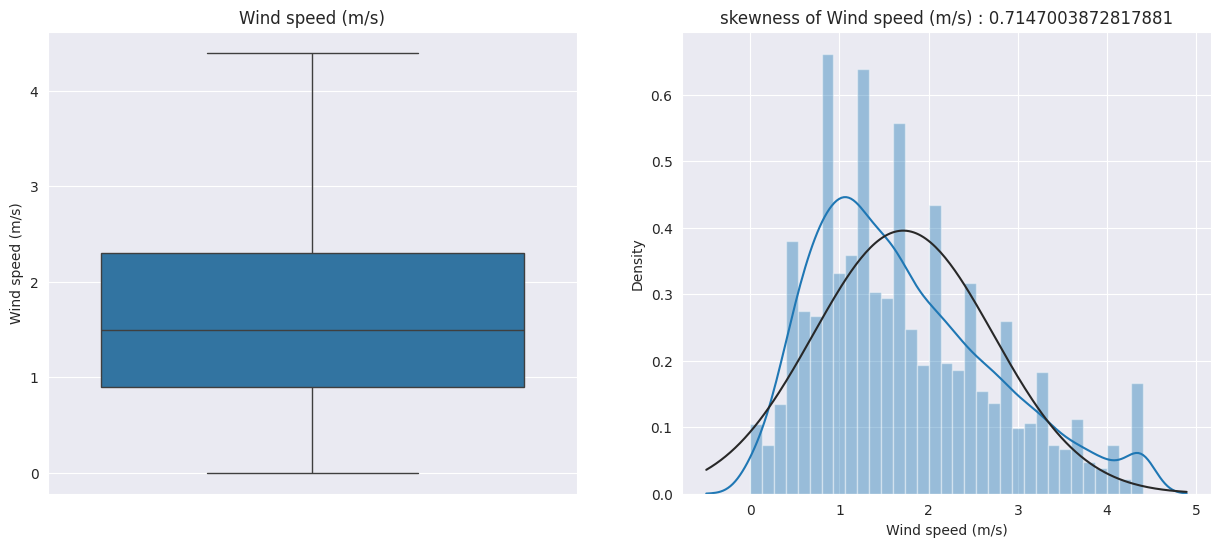

____________________________________________________________________________________________________


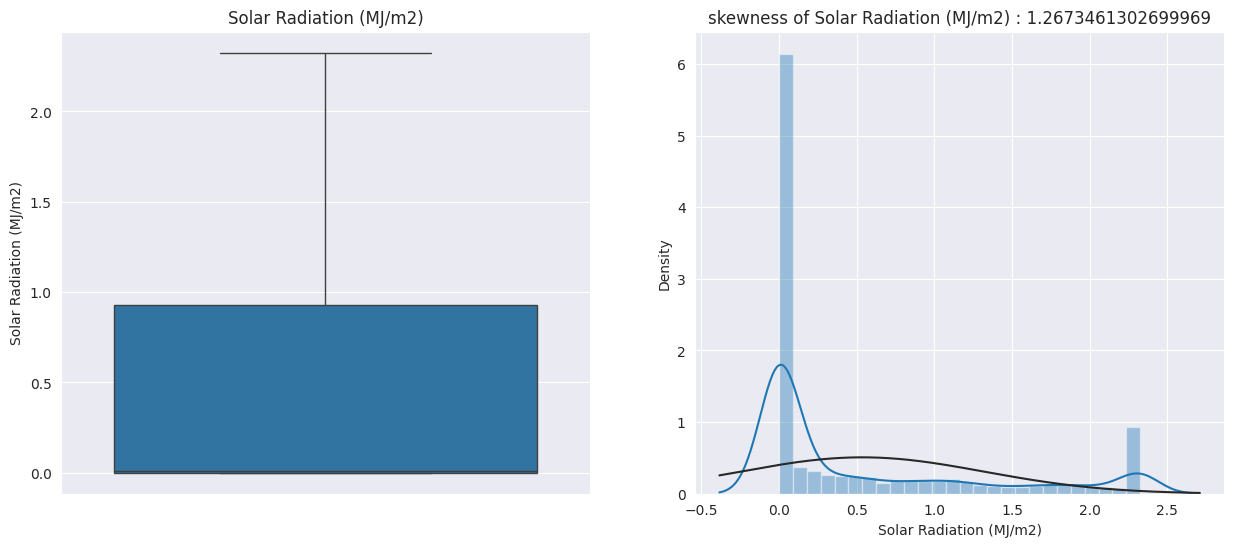

In [ ]:
# Checking outliers for after removing it

for var in outlier_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*50)
    plt.show()

Outliers are successfully removed from datasets.

In [ ]:
# Final Basic description of dataset
df.describe()

Date  Rented Bike Count         Hour  \
count                           8760        8760.000000  8760.000000   
mean   2018-05-31 23:59:59.999999744         698.789812    11.500000   
min              2017-12-01 00:00:00           0.000000     0.000000   
25%              2018-03-02 00:00:00         191.000000     5.750000   
50%              2018-06-01 00:00:00         504.500000    11.500000   
75%              2018-08-31 00:00:00        1065.250000    17.250000   
max              2018-11-30 00:00:00        2376.625000    23.000000   
std                              NaN         626.910124     6.922582   

       Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count      8760.000000  8760.000000       8760.000000       8760.000000   
mean         12.882922    58.226256          1.715993       1436.825799   
min         -17.800000     0.000000          0.000000         27.000000   
25%           3.500000    42.000000          0.900000        940.000000   
50%          13.700000    57.000000          1.500000       1698.000000   
75%          22.500000    74.000000          2.300000       2000.000000   
max          39.400000    98.000000          4.400000       2000.000000   
std          11.944825    20.362413          1.008186        608.298712   

       Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                8760.000000              8760.000000   8760.000000   
mean                    4.073813                 0.536235      0.148687   
min                   -30.600000                 0.000000      0.000000   
25%                    -4.700000                 0.000000      0.000000   
50%                     5.100000                 0.010000      0.000000   
75%                    14.800000                 0.930000      0.000000   
max                    27.200000                 2.325000     35.000000   
std                    13.060369                 0.785364      1.128193   

       Snowfall (cm)  
count    8760.000000  
mean        0.075068  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         8.800000  
std         0.436746

.

## **<u>Data Wrangling and Feature Engineering<u>**

In [ ]:
# Dataset
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01              254.0     0             -5.2           37   
1 2017-12-01              204.0     1             -5.5           38   
2 2017-12-01              173.0     2             -6.0           39   
3 2017-12-01              107.0     3             -6.2           40   
4 2017-12-01               78.0     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
# Performing feature engineering on feature Date
df['day']=df['Date'].dt.day
df['month']=df['Date'].dt.month
df['year']=df['Date'].dt.year

In [ ]:
# Dropping original  Date feature after performing feature engineering
df.drop(columns='Date', axis=1, inplace=True)

In [ ]:
# Bsic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   float64
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  day                        8760 non-null   int32

In [ ]:
# Checking dataset
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0              254.0     0             -5.2           37               2.2   
1              204.0     1             -5.5           38               0.8   
2              173.0     2             -6.0           39               1.0   
3              107.0     3             -6.2           40               0.9   
4               78.0     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  day  \
0           0.0            0.0  Winter  No Holiday             Yes    1   
1           0.0            0.0  Winter  No Holiday             Yes    1   
2           0.0            0.0  Winter  No Holiday             Yes    1   
3           0.0            0.0  Winter  No Holiday             Yes    1   
4           0.0            0.0  Winter  No Holiday             Yes    1   

   month  year  
0     12  2017  
1     12  2017  
2     12  2017  
3     12  2017  
4     12  2017

The variables day, month, and year were created from the variable Date, and the original variables were deleted.

## **<u>Exploratory data analysis<u>**

#### **Univariate Analysis**

In [ ]:
# Obtaing target variable
excluded_variables=[var for var in df.columns if len(df[var].value_counts()) > 15]
target_variables=[var for var in df.columns if var not in excluded_variables]

# Defining r to autofit the number and size of plots
r = int(len(target_variables)/3 +1)

In [ ]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

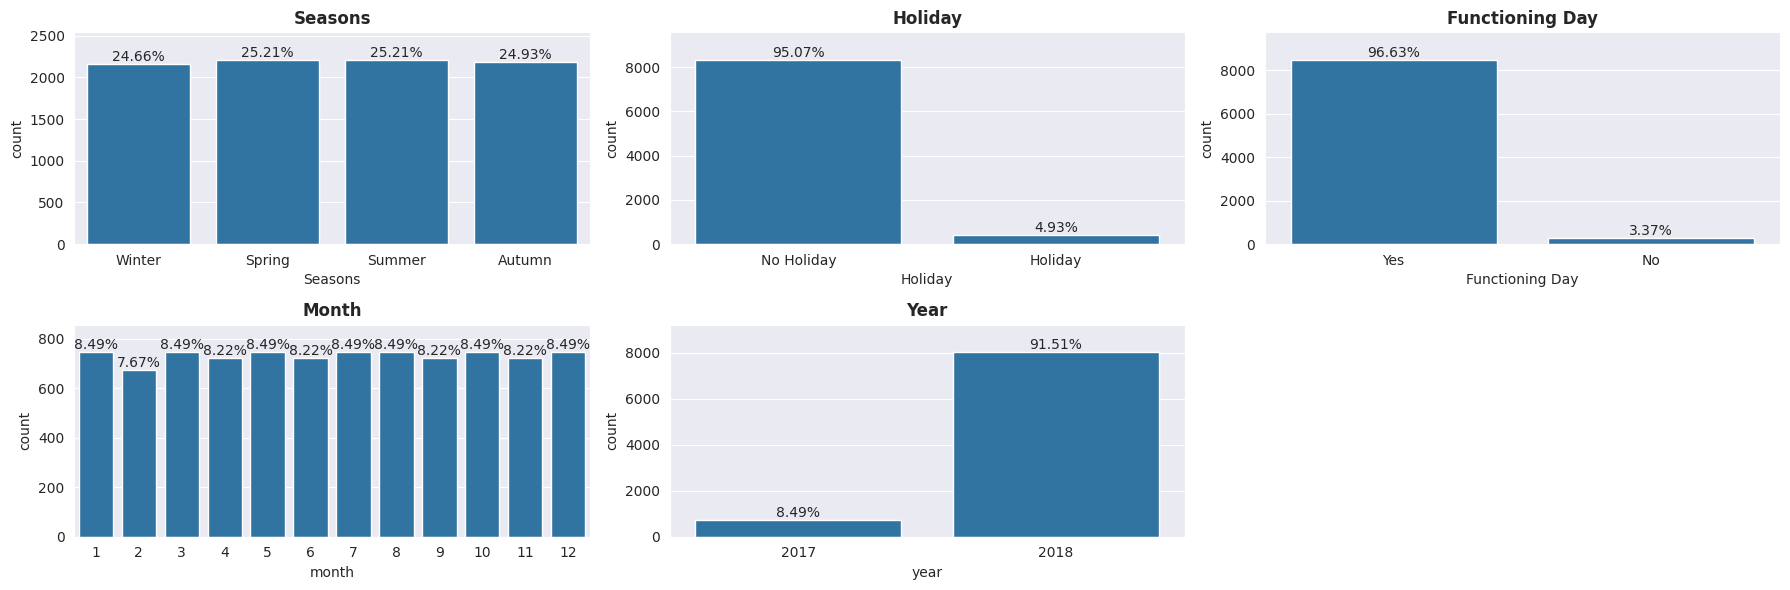

In [ ]:
# Plotting the countplots for each variable in target_variables
plt.figure(figsize=(18,r*3))
for n,var in enumerate(target_variables):
    plot = plt.subplot(r,3,n+1)
    sns.countplot(x=df[var]).margins(y=0.15)
    plt.title(f'{var.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

**Observations :**
- Customers favour rental motorcycles equally in all seasons.
- When there are no holidays, customers choose to rent motorcycles. Customers hardly ever use the bikes they rent while traveling on holiday.
- Nearly all consumers preferred to rent bikes during functional hours.
- Bicycle rentals are popular all month long.
- Renting bicycles was not very popular in 2017, but it increased by 83.02 percent in 2018.

#### **<u>Bivariate Analysis<u>**

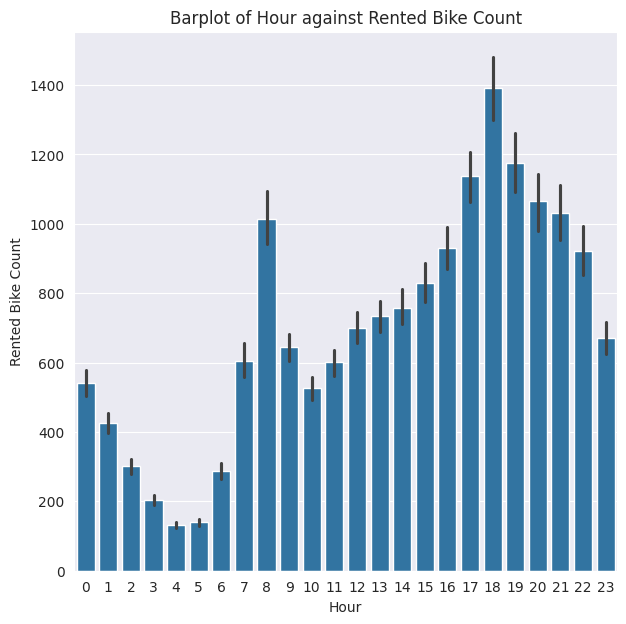

In [ ]:
# Plotting graph of 'Hour' against 'Rented Bike Count'
plt.figure(figsize=(7,7))
ax=sns.barplot(x="Hour", y="Rented Bike Count",data=df)
ax.set_title('Barplot of Hour against Rented Bike Count')
plt.show()

**Observations :**
- At night, customers do not prefer to use rented bikes.
- Customers do not prefer rented bikes in the mornings 4 and 5, but from 7, 8, and 9, the use of rented bikes increases, possibly due to working people going to the office, and it is the same in the evenings 5, 6, and 7, because people are travelling from the office to home. Overall, the rented bike was the most frequently used during office in and out times.
- Customers mostly use rented bikes for transportation in the evening.

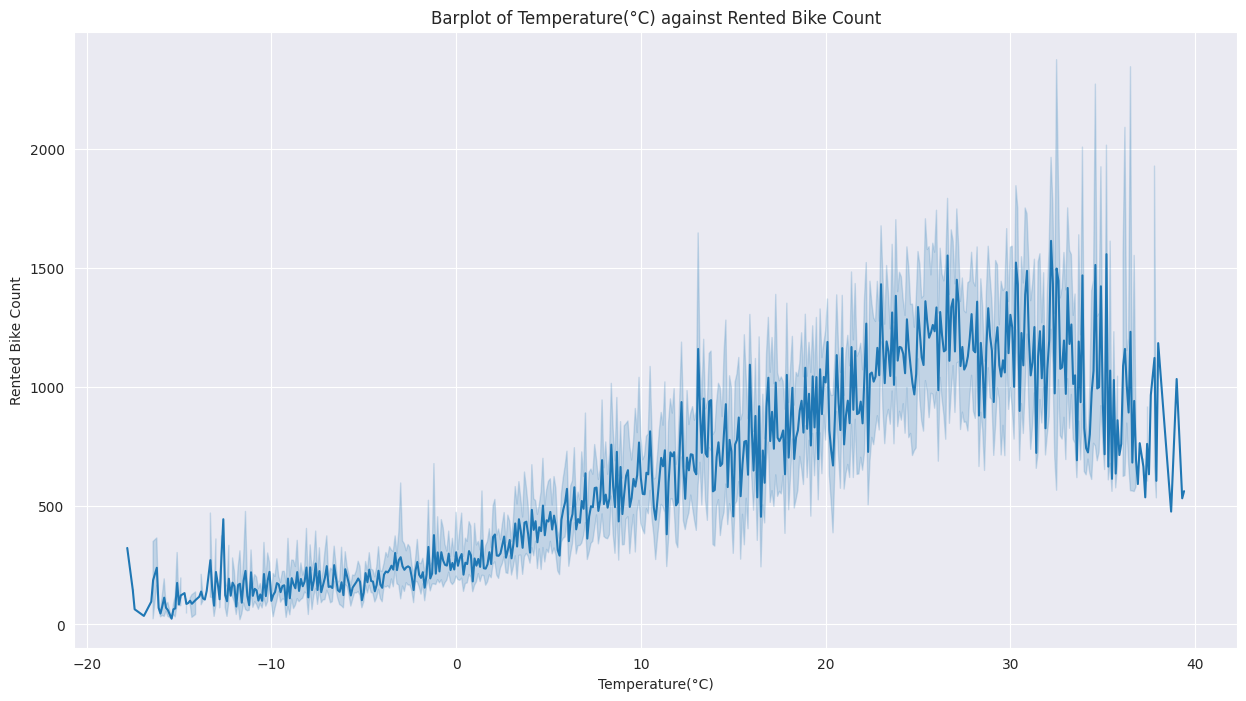

In [ ]:
# Checking effect of temperature(°C) on rented bike use
plt.figure(figsize=(15,8))
ax=sns.lineplot(x="Temperature(°C)", y="Rented Bike Count",data=df)
ax.set_title('Barplot of Temperature(°C) against Rented Bike Count')
plt.show()

**Observations :**
- Most customers use a rented bike when the temperature is normal, but when the temperature is below normal, people do not use a rented bike.

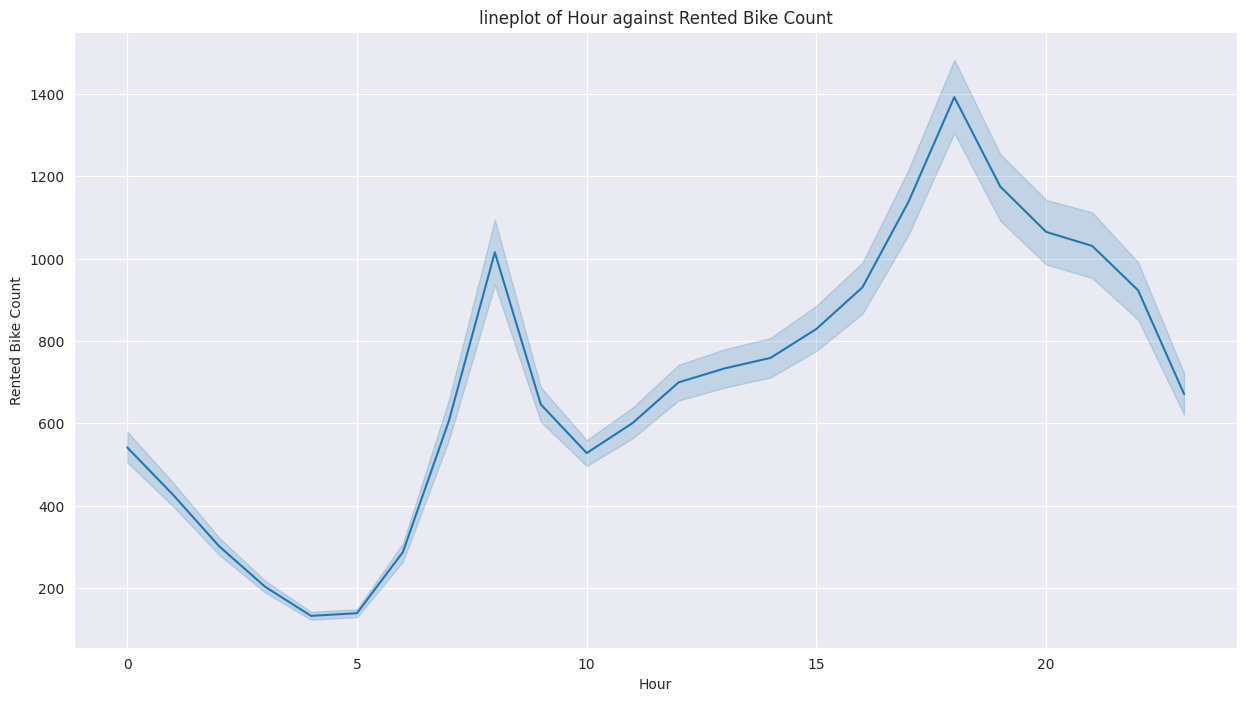

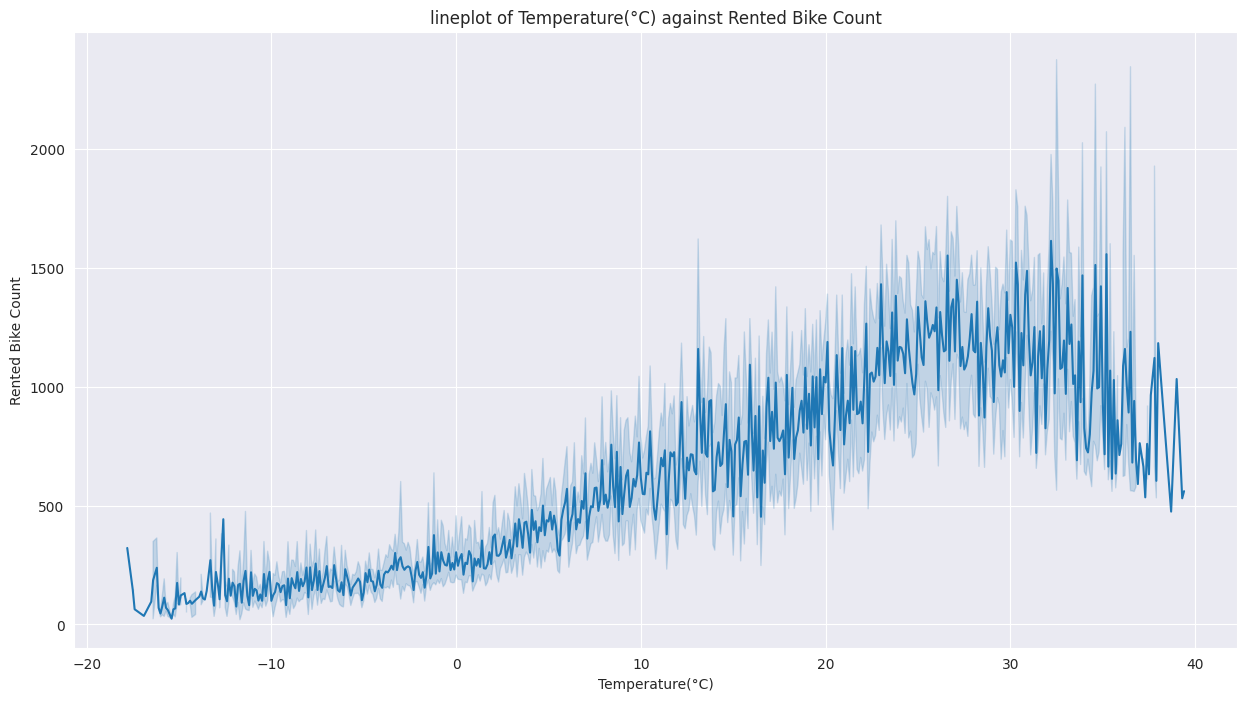

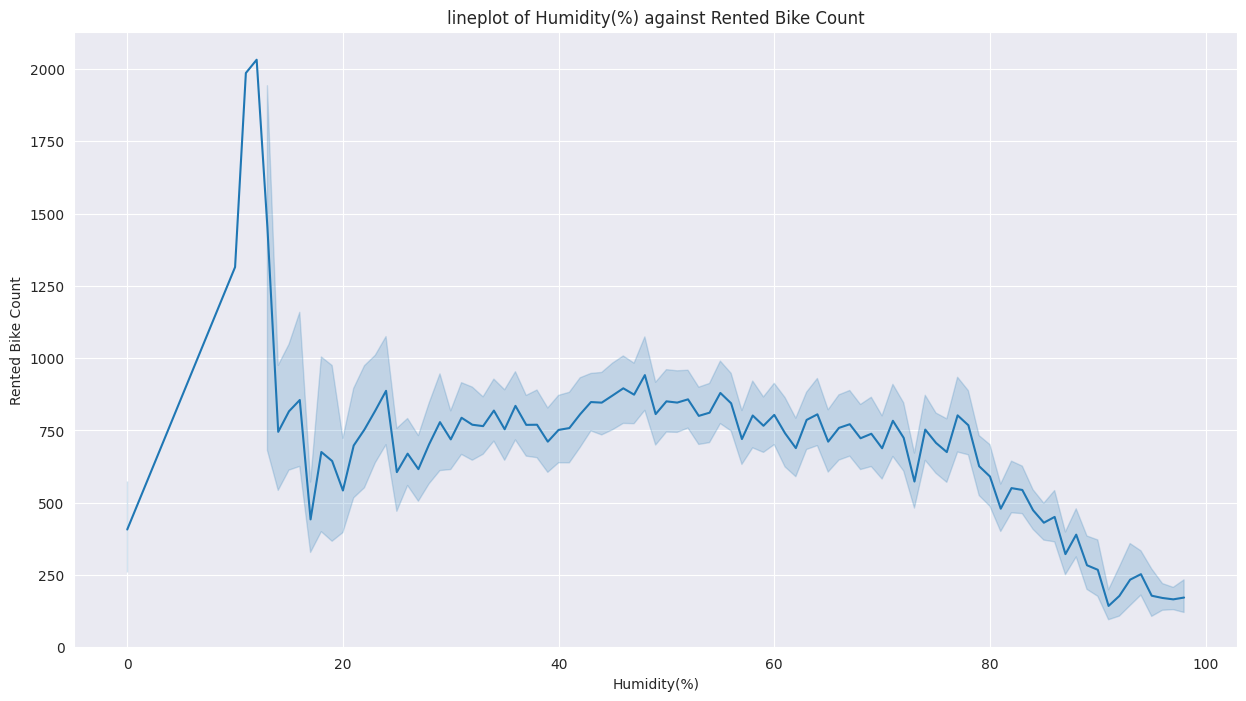

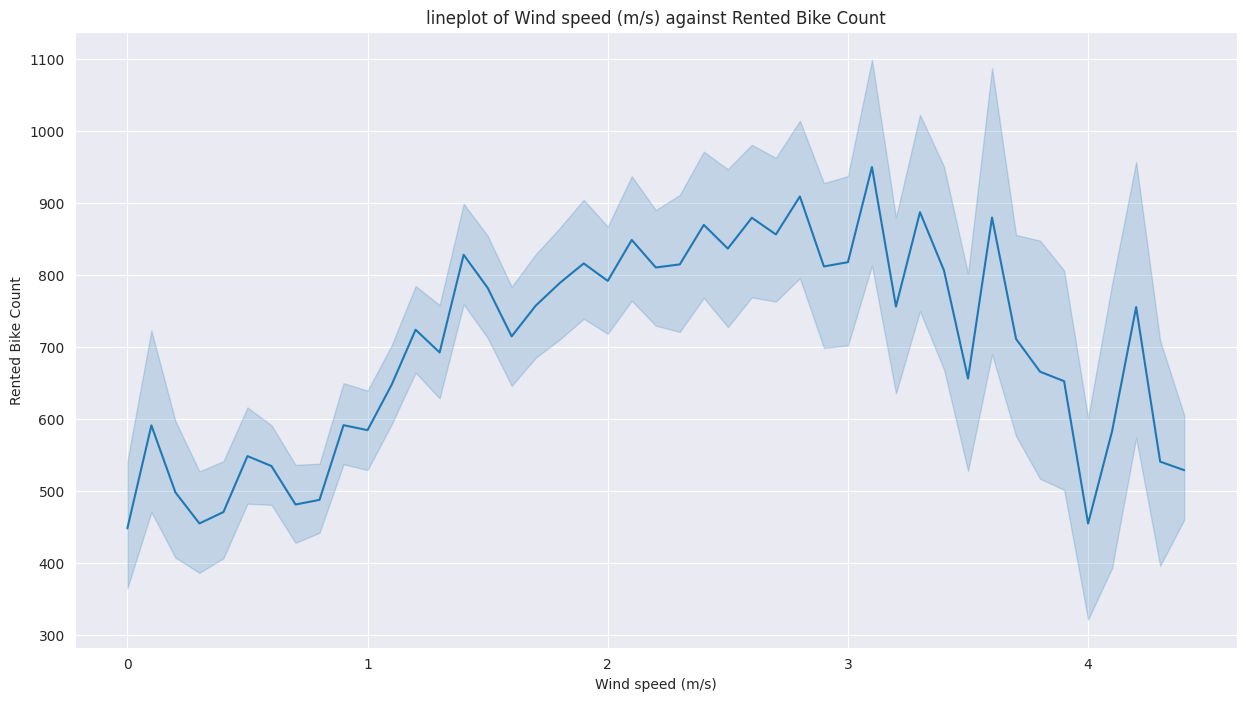

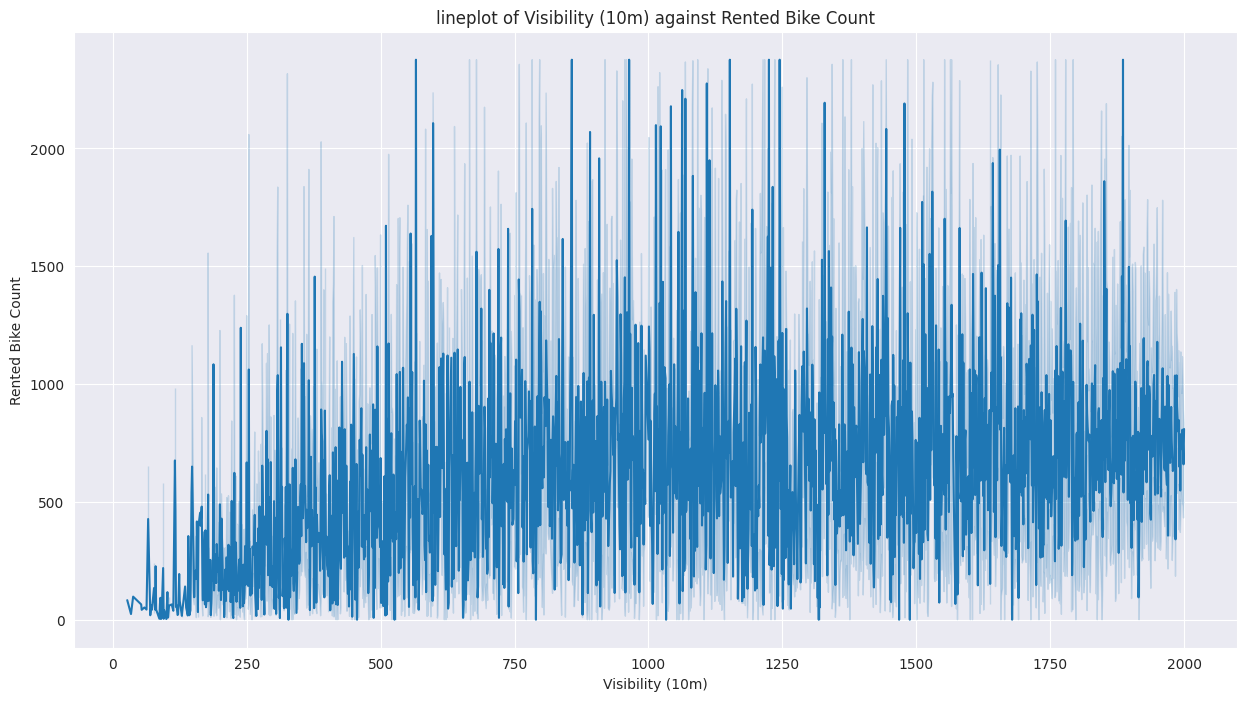

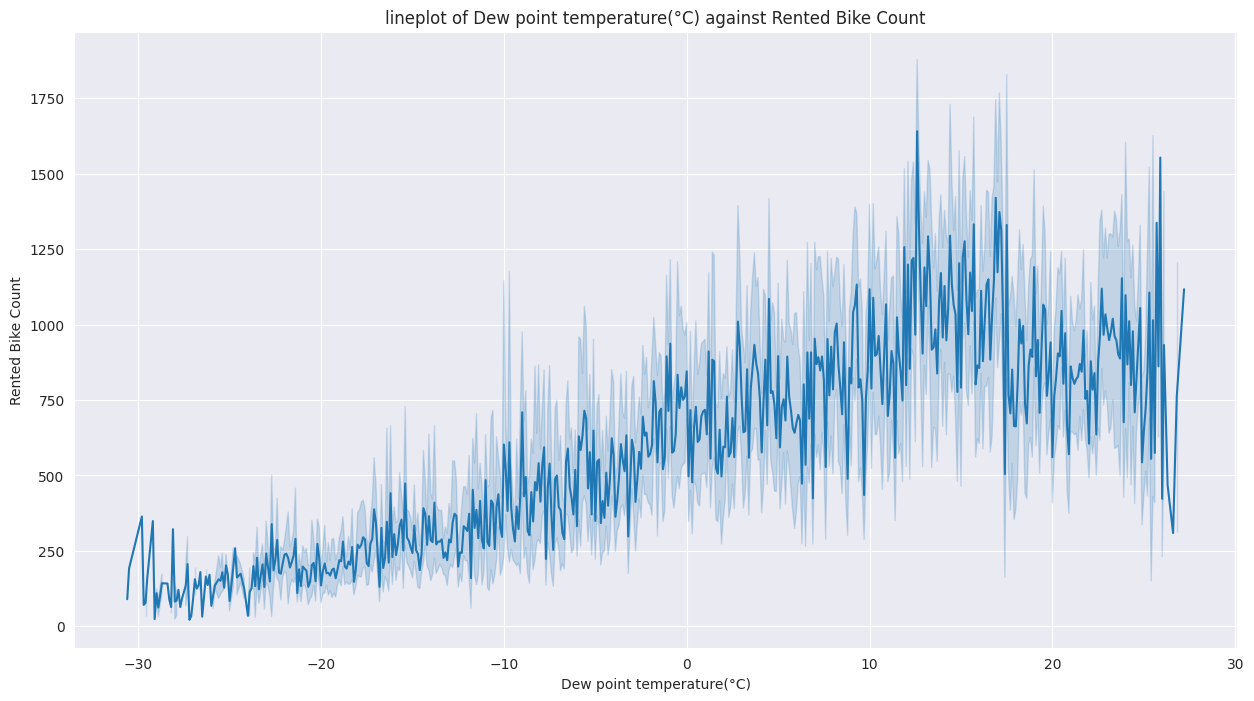

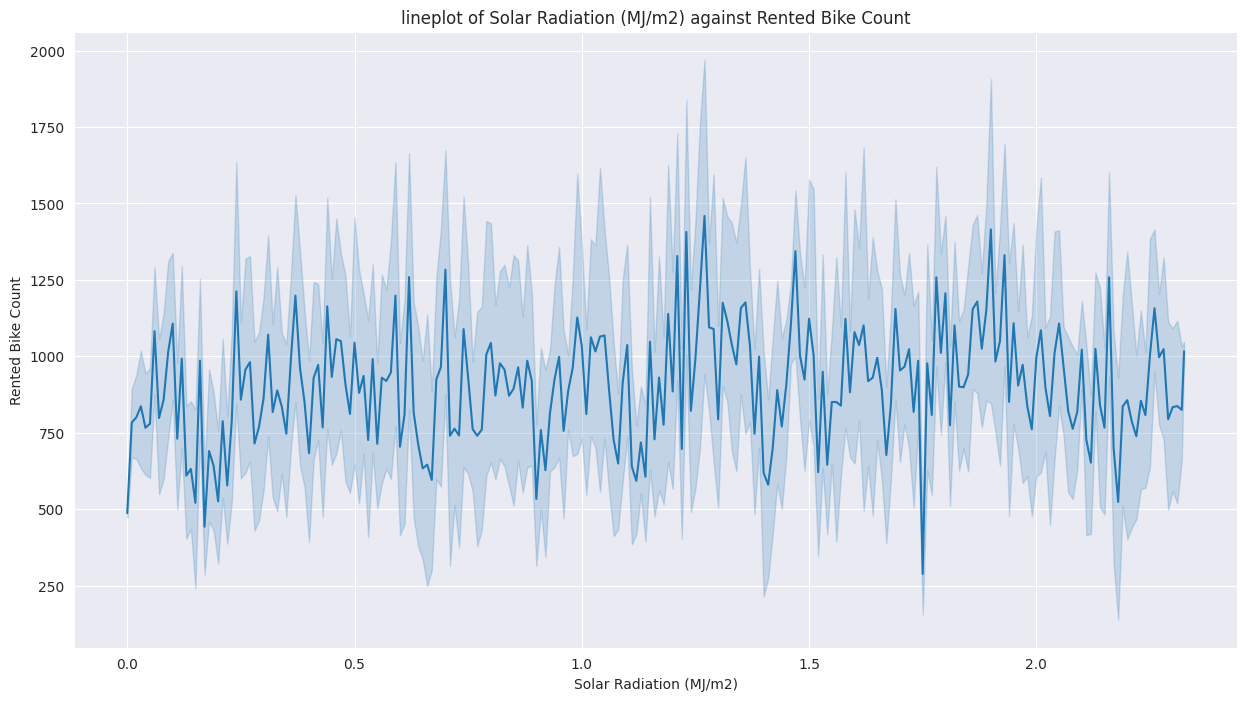

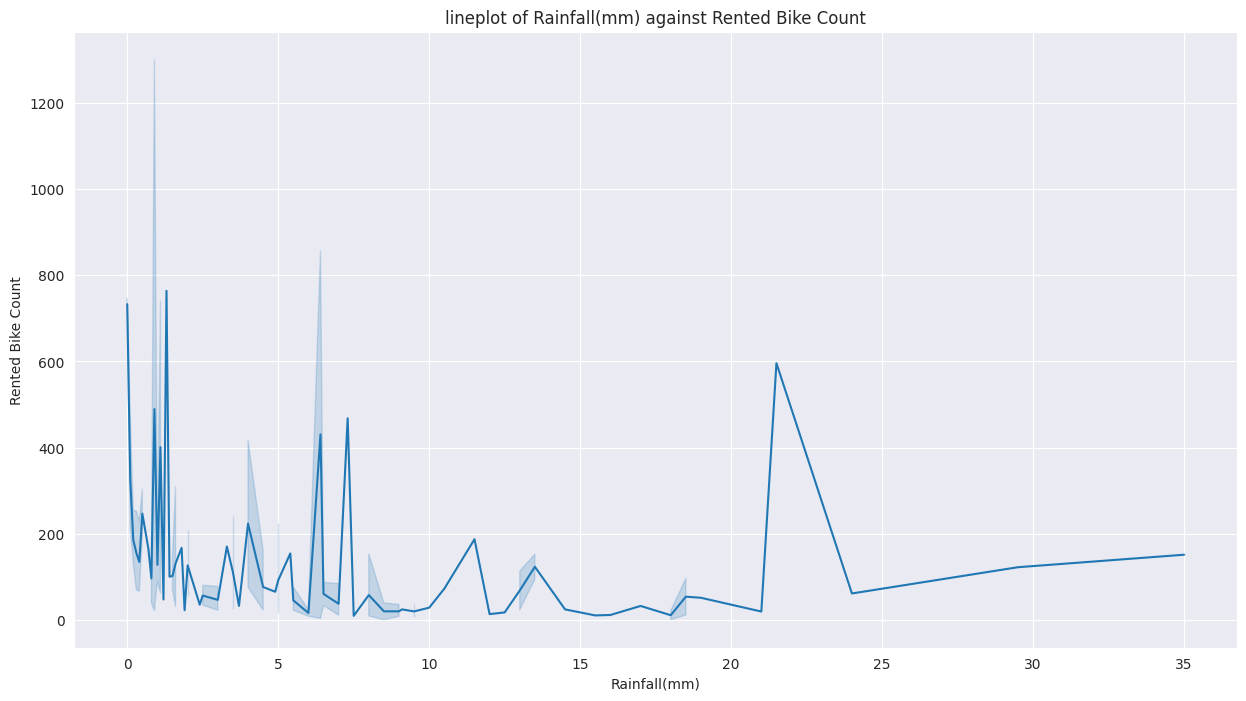

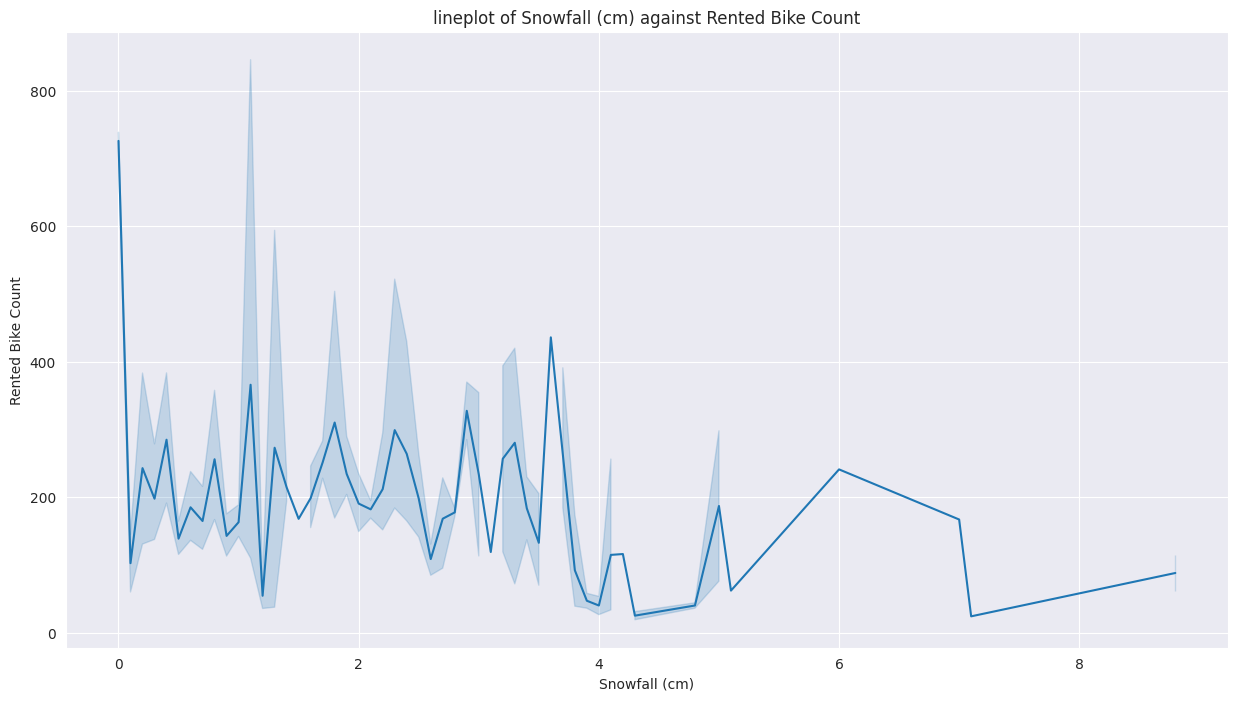

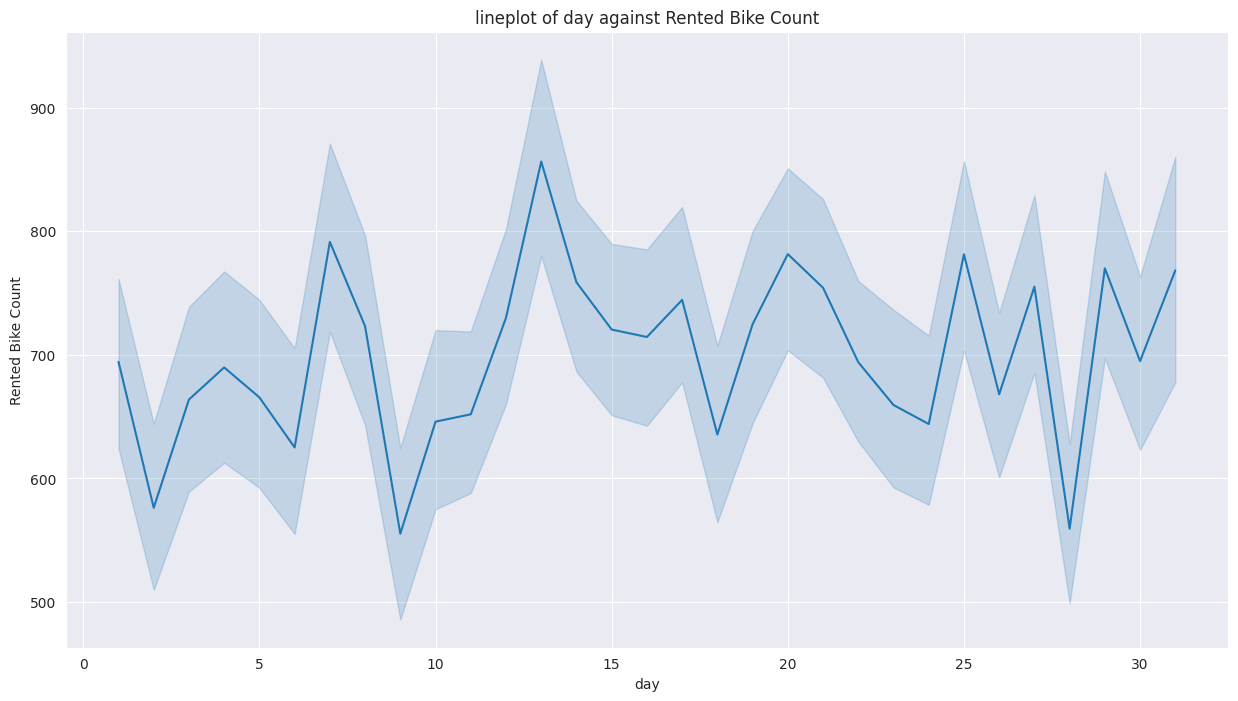

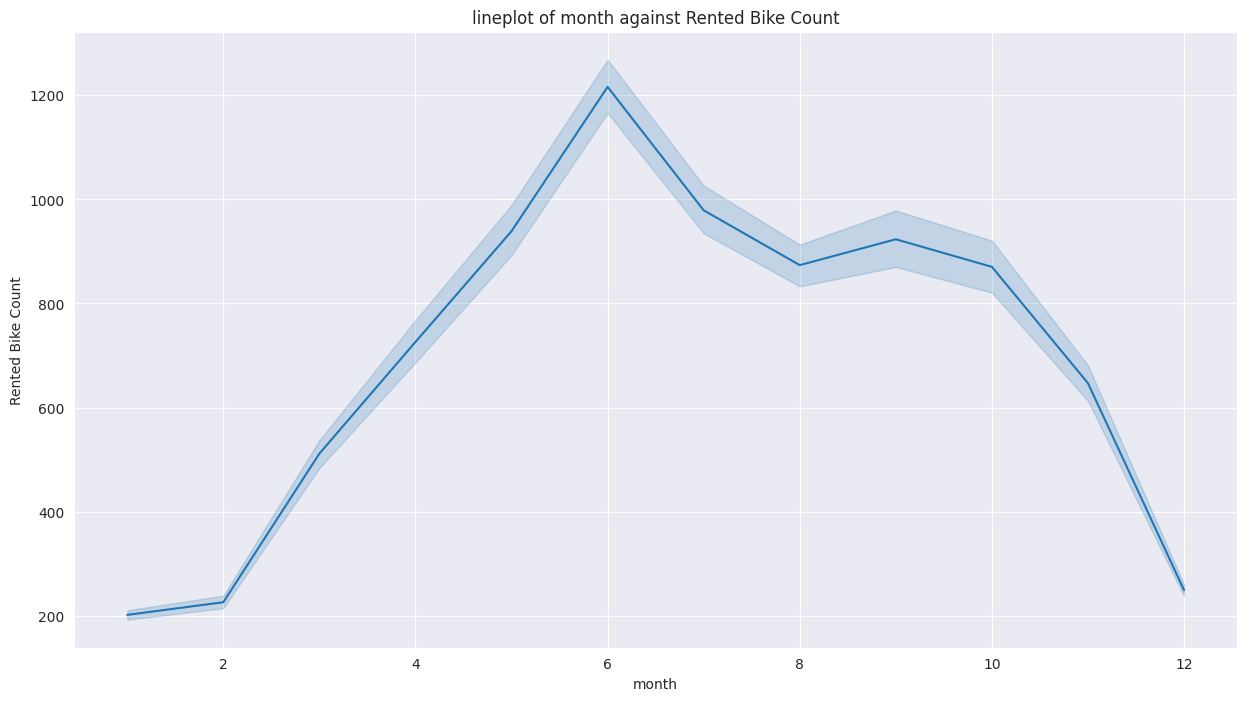

In [ ]:
# Checking effect of each variable on use of rented bike
target_variables=[var for var in df.columns if var not in ['Rented Bike Count', 'Seasons', 'Holiday', 'Functioning Day', 'year']]
for var in target_variables:
    plt.figure(figsize=(15,8))
    ax=sns.lineplot(x=df[var], y=df["Rented Bike Count"],data=df)
    ax.set_title(f'lineplot of {var} against Rented Bike Count')
    plt.show()

**Obsevations :**
- Customers who travel most commonly use rented bikes in the morning at 8 a.m. and in the evening at 6 p.m.
- When the humidity level is between 10% and 18%, people prefer to rent bikes.
- When wind speed is between 2 m/s and 3.5 m/s, people consistently use rented bikes, and it is at its peak when wind speed is normal, which is 3.2 m/s.
- Renting a bike is the best option for customers in dew point temperatures ranging from 12°C to 18°C. The use of a rented bike increases with increasing dew point temperatures, but it still reaches normal dew point temperatures.
- According to the graph, solar radiation has no effect on customer use of rented bikes.
- When it's not raining, people prefer rental bikes the most.
- When there is no snowfall, most people opt to rent bikes. However, the majority of customers prefer to rent bikes when it snows up to 4 cm.
- In the first 10 days of the month, most rented bikes are used by customers. Customers consistently use rented bikes in the last 15 days of the month.
- In June, most rented bikes are used through the year, followed by October. Customers' use of rent bikes is at its peak from April to September.

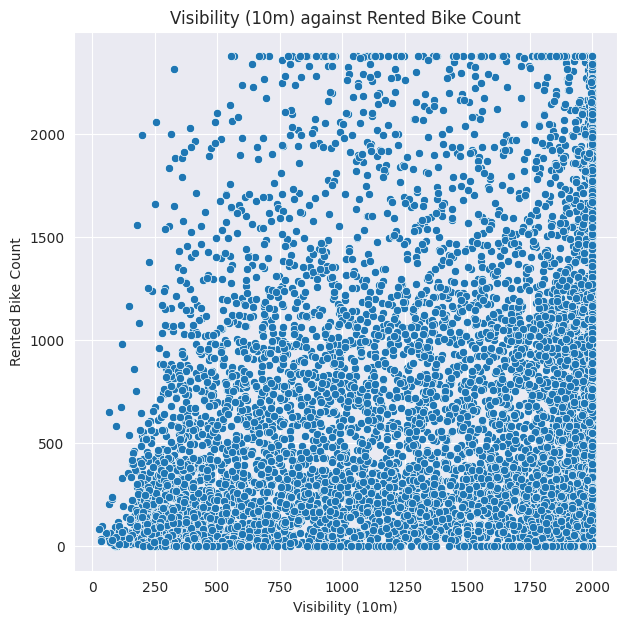

In [ ]:
# Plotting graph of 'Visibility (10m)' against 'Rented Bike Count'
plt.figure(figsize=(7,7))
ax=sns.scatterplot(x="Visibility (10m)", y="Rented Bike Count",data=df)
ax.set_title('Visibility (10m) against Rented Bike Count')
plt.show()

**Observation :**
- The count of rented bikes on that day is unaffected by the day's visibility, but when visibility exceeds 1750, use of rented bikes increases more than usual.

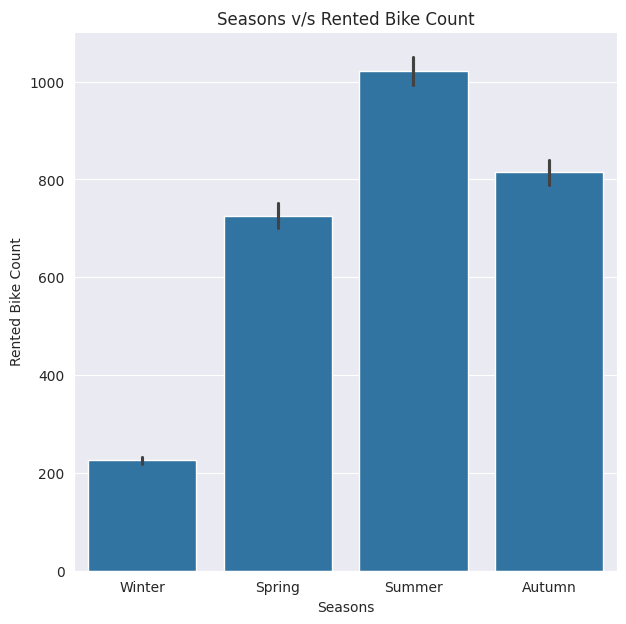

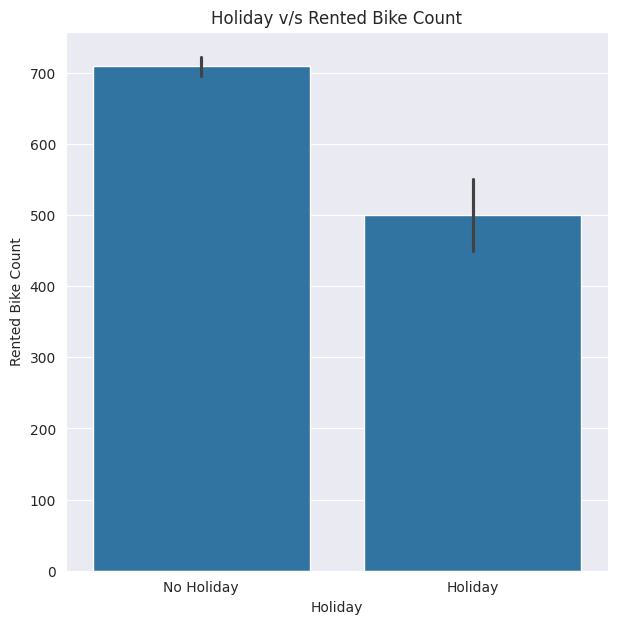

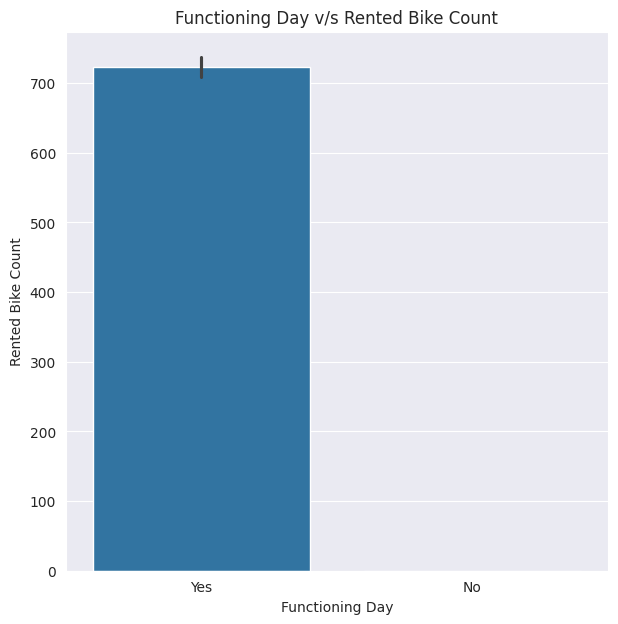

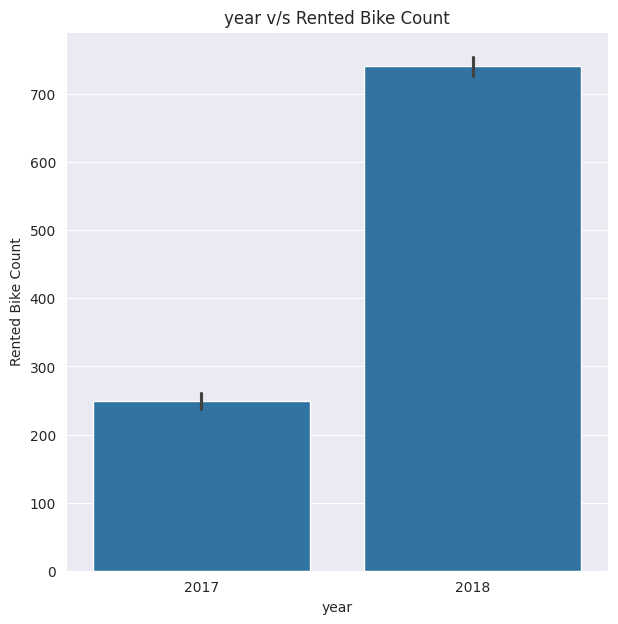

In [ ]:
# Plotting bar plot for variables

# Defining target variables
target=[var for var in df.columns if var in ['Seasons', 'Holiday', 'Functioning Day', 'year']]

for var in target:
    plt.figure(figsize=(7,7))
    ax=sns.barplot(x=df[var], y='Rented Bike Count', data=df)
    ax.set_title(f'{var} v/s Rented Bike Count')
    plt.show()

**Observations :**
- During the summer and autumn seasons, most people rent bikes. During the winter, fewer people choose to rent bikes.
- Even when there is no holiday other than a holiday, people rent bikes. The use of rented bikes on holidays is lower than on non-holiday days.
- Almost every rented bike is used during its functional hours.
- The use of rented bikes increased by three times in 2018 compared to 2017.

.

## **<u>Data Pre-processing<u>**

#### **<i>[1] Checking Distribution of each feature and transform it to normal distribution<i>**

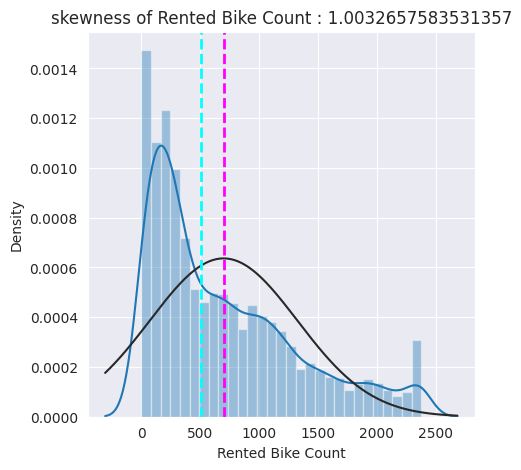

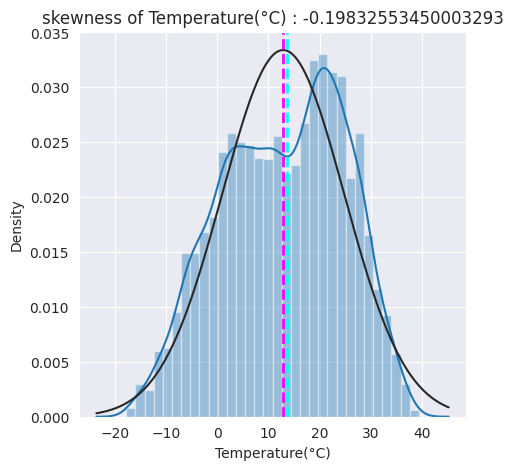

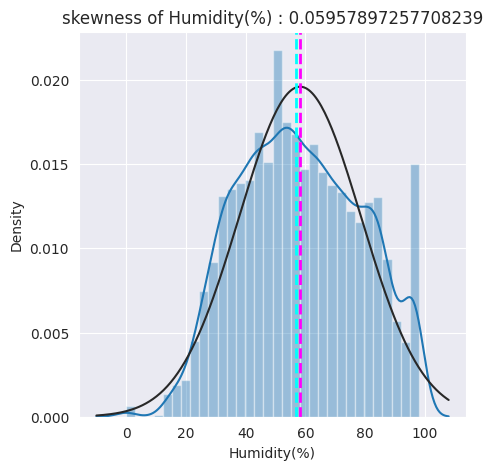

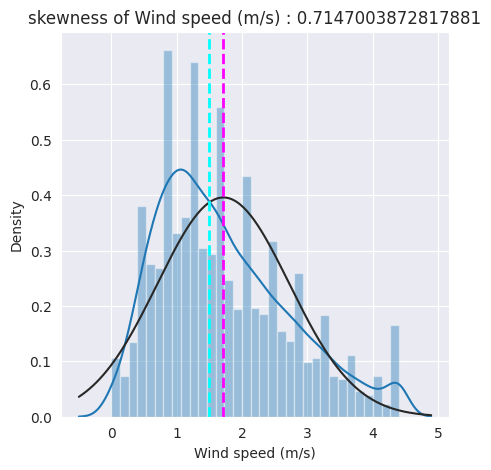

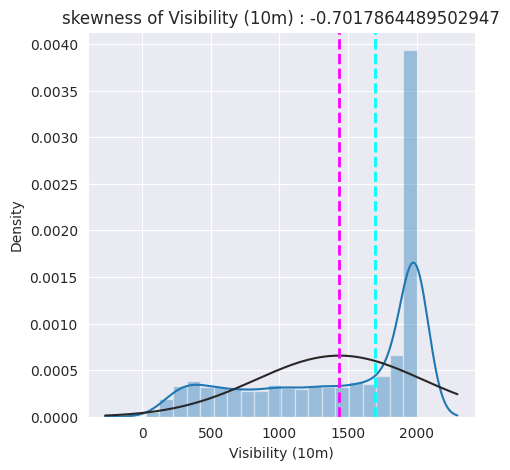

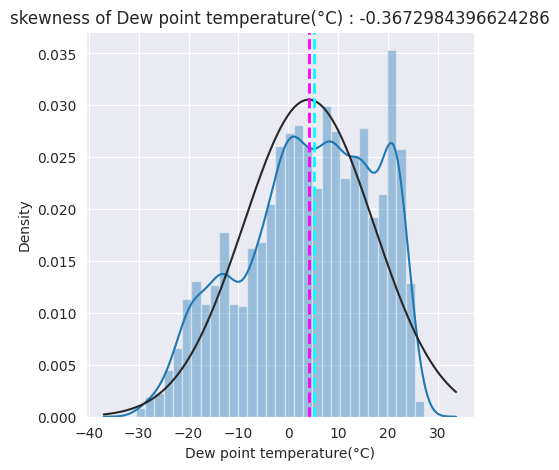

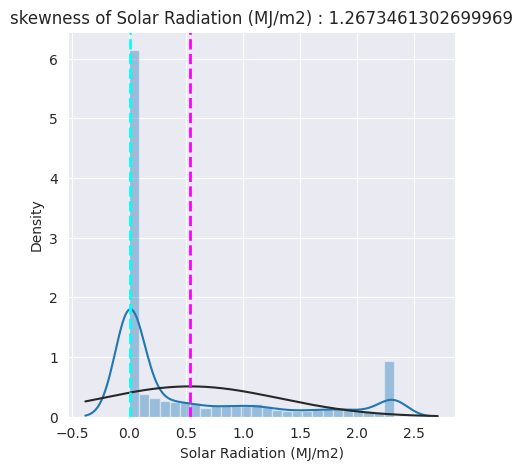

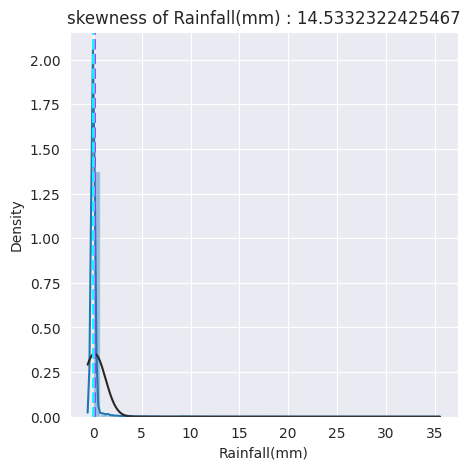

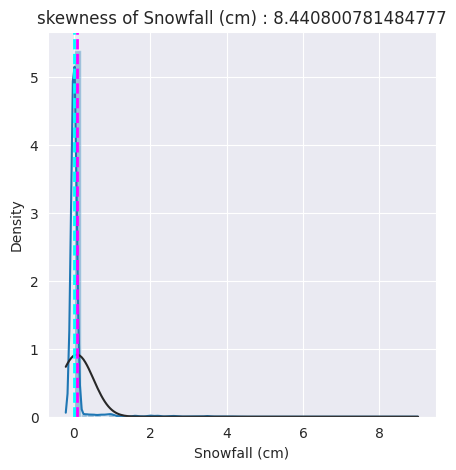

In [ ]:
# Ckecking distribution of numerical feature
# Defining numerical continuous variables
num_variables=['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# Plotting distribution plot for each numerical variables
from scipy.stats import norm
for var in num_variables:
    plt.figure(figsize=(5,5))
    ax=sns.distplot(df[var], fit=norm)
    ax.axvline(df[var].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(df[var].median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    plt.show()

In [ ]:
# import module
from tabulate import tabulate

# assign data
mydata = [
    ["Rented Bike Count", "1.0032657583531357", 'Slightly'],
    ["Temperature(°C", "-0.19832553450003293", 'Nearly Symmetrical'],
    ["Humidity(%)", "0.05957897257708239",'Nearly Symmetrical'],
      ["Wind speed (m/s)", "0.7147003872817881",'Slightly'],
    ['Visibility (10m)','-0.7017864489502947','Slightly'],['Dew point temperature(°C)',' -0.3672984396624286', 'Nearly Symmetrical'],['Solar Radiation (MJ/m2)','1.2673461302699969', 'Slightly'],
    ['Rainfall(mm)','14.5332','Large'], ['Snowfall (cm)','8.440800781484777', 'Large']
]

# create header
head = ["Feature Name", "Skew", 'Skew-Type']

# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+---------------------------+-----------+--------------------+
| Feature Name              |      Skew | Skew-Type          |
+===========================+===========+====================+
| Rented Bike Count         |  1.00327  | Slightly           |
+---------------------------+-----------+--------------------+
| Temperature(°C            | -0.198326 | Nearly Symmetrical |
+---------------------------+-----------+--------------------+
| Humidity(%)               |  0.059579 | Nearly Symmetrical |
+---------------------------+-----------+--------------------+
| Wind speed (m/s)          |  0.7147   | Slightly           |
+---------------------------+-----------+--------------------+
| Visibility (10m)          | -0.701786 | Slightly           |
+---------------------------+-----------+--------------------+
| Dew point temperature(°C) | -0.367298 | Nearly Symmetrical |
+---------------------------+-----------+--------------------+
| Solar Radiation (MJ/m2)   |  1.26735  | Slightly     

In [ ]:
# Transforming distribution to normal using different transformations

# For positively skewed data
df['Rented Bike Count']=(df['Rented Bike Count']+1).transform(np.sqrt)
df['Wind speed (m/s)']=(df['Wind speed (m/s)']+1).transform(np.log)
df['Solar Radiation (MJ/m2)']=(df['Solar Radiation (MJ/m2)']+1).transform(np.log)

# For negatively skewed data
df['Visibility (10m)']=(max(df['Visibility (10m)']+1)-df['Visibility (10m)']).transform(np.sqrt)

# For large skewed data
df['Rainfall(mm)']=(df['Rainfall(mm)']+1).transform(np.log)
df['Snowfall (cm)']=(df['Snowfall (cm)']+1).transform(np.log)

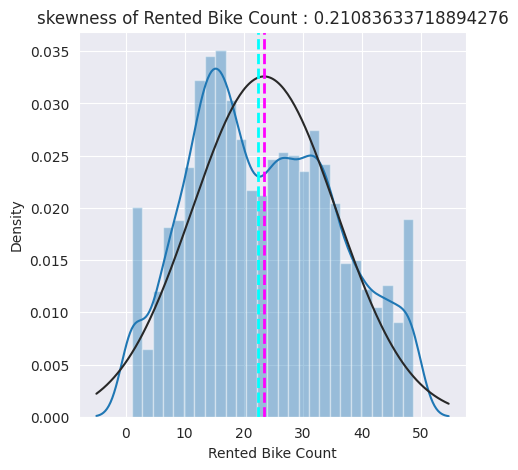

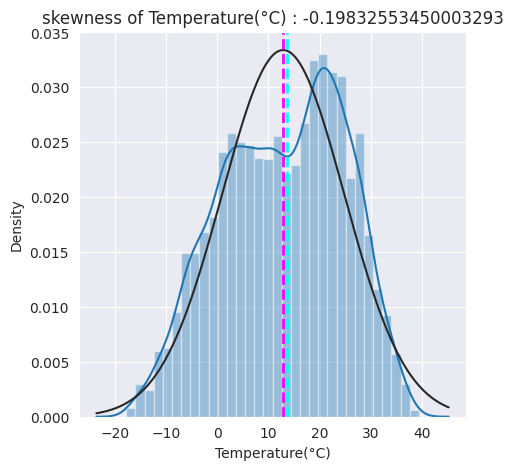

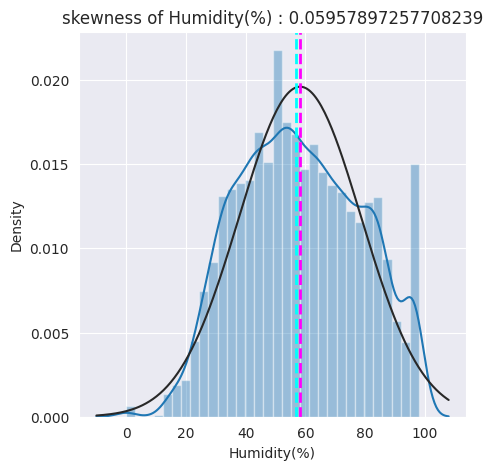

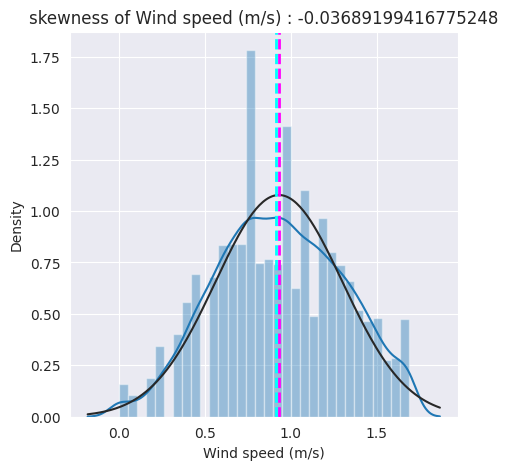

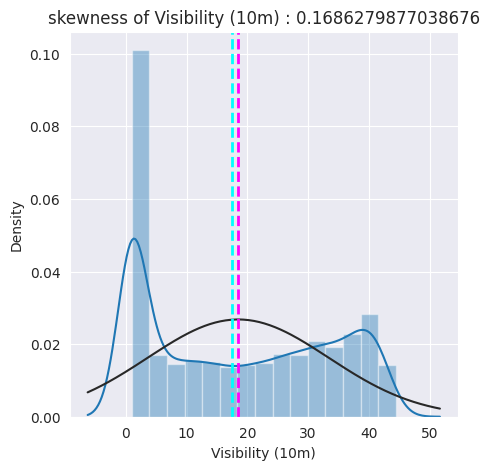

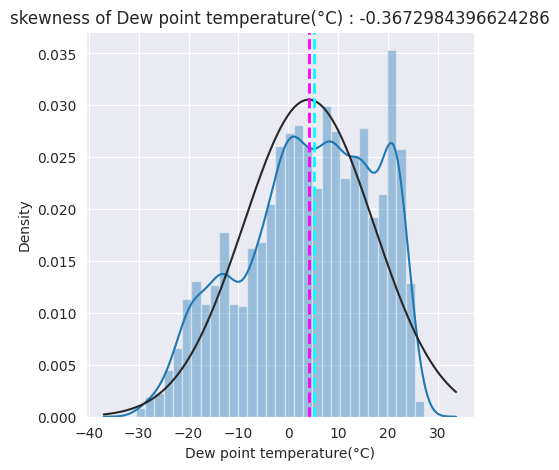

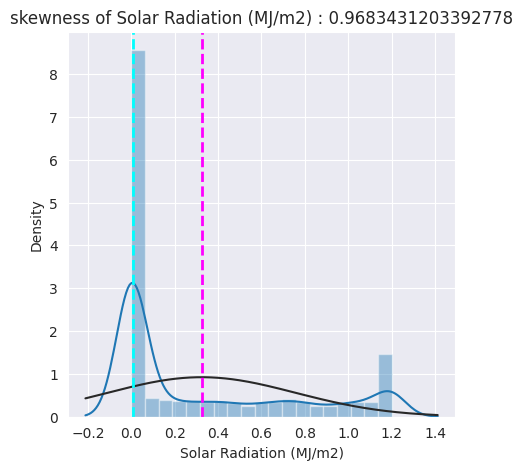

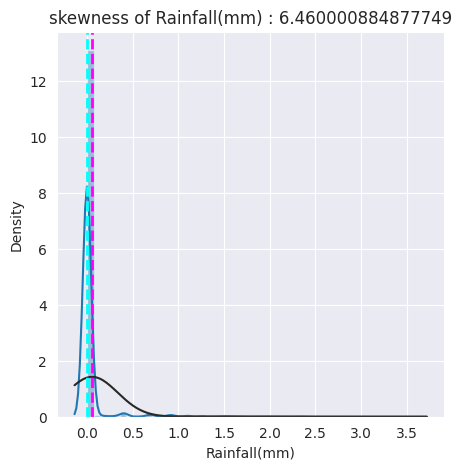

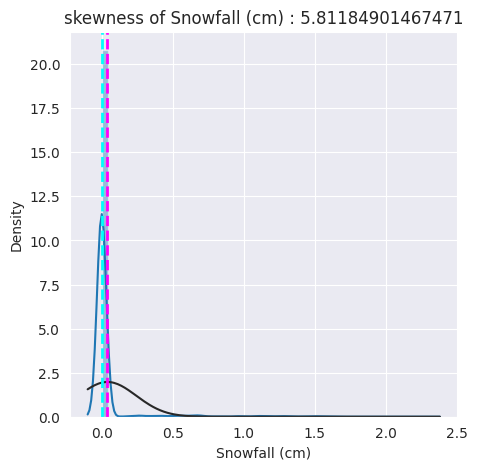

In [ ]:
# Checking distribution after transformed data to normal distribution
from scipy.stats import norm
for var in num_variables:
    plt.figure(figsize=(5,5))
    ax=sns.distplot(df[var], fit=norm)
    ax.axvline(df[var].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(df[var].median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    plt.show()

By applying log and sq root transformations, we give variables a distribution that is close to being normal.

.

#### **<i>[2] Checking relationship between independent and dependent variables is linear<i>**

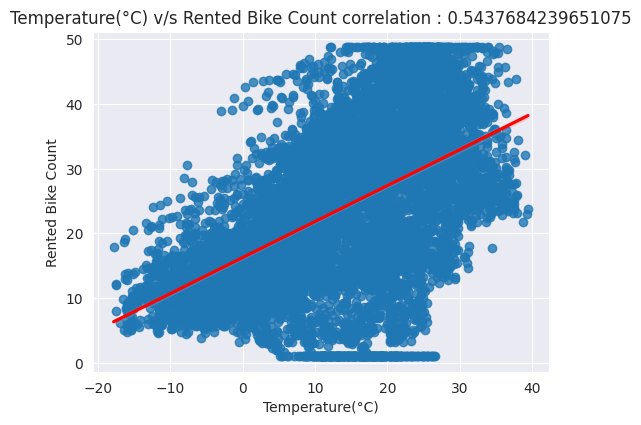

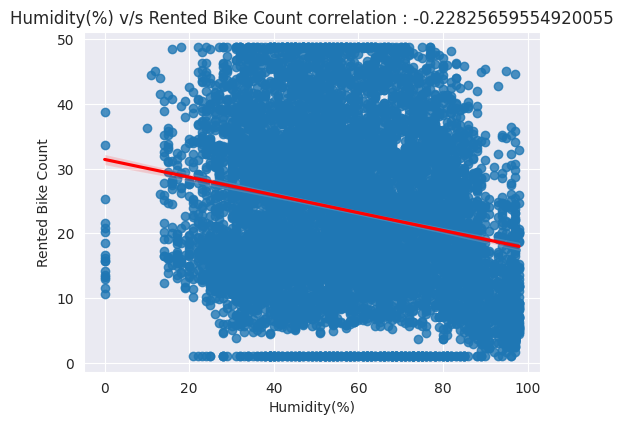

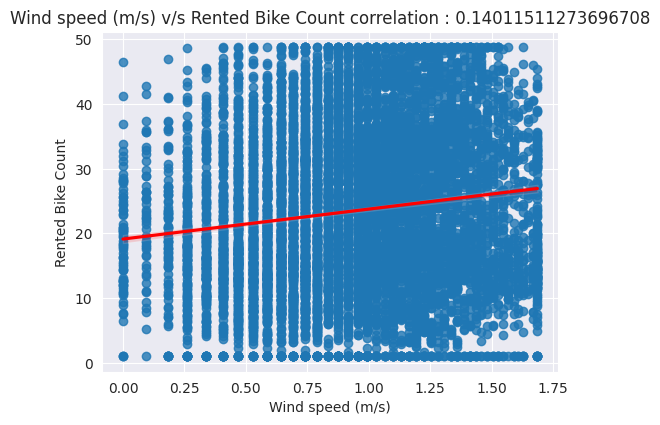

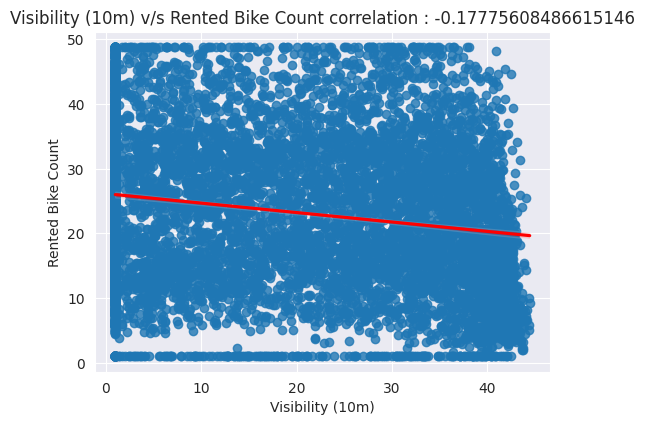

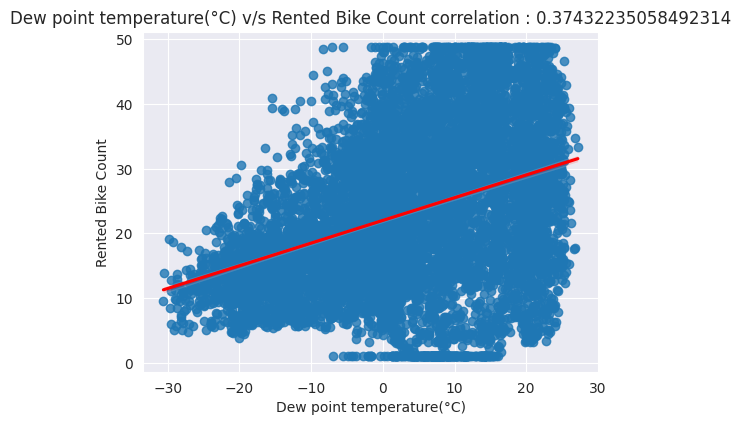

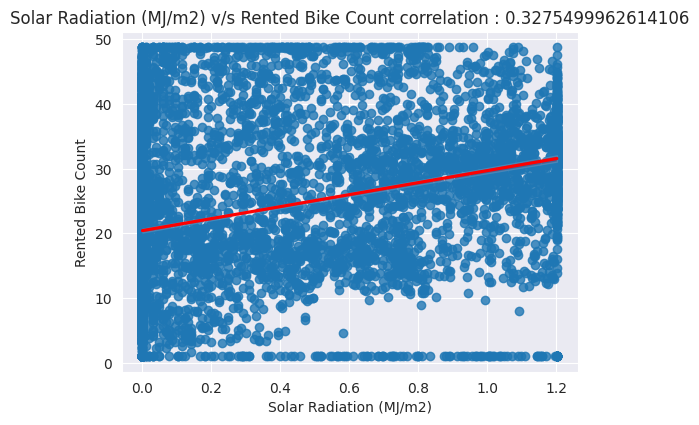

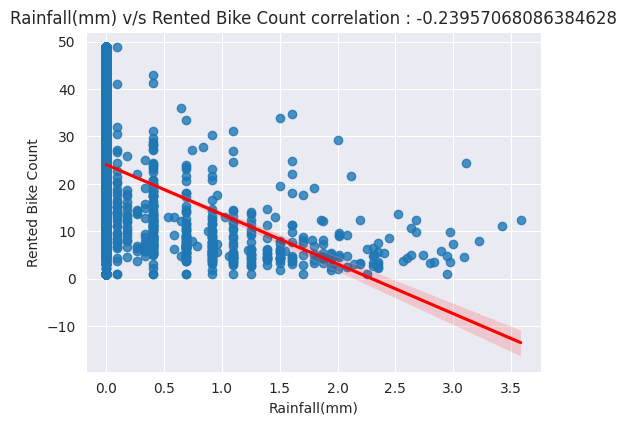

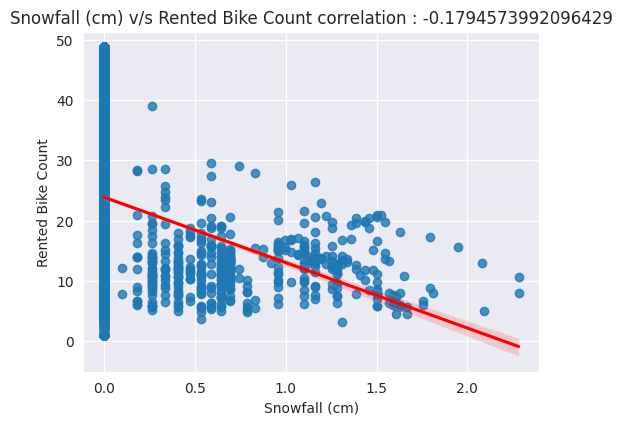

In [ ]:
# Plotting regression plot
for n, var in enumerate([var for var in num_variables if var not in ['Rented Bike Count']]):
    plt.figure(figsize=(20,15))
    plt.subplot(3,3,n+1)
    # Finding correlation of independant variables with dependant variable
    dependant_var=df['Rented Bike Count']
    independant_var=df[var]
    correlation=independant_var.corr(dependant_var)
    ax=sns.regplot(x=df[var], y=df['Rented Bike Count'], data=df, line_kws={"color": "red"})
    ax.set_title(f'{var} v/s Rented Bike Count correlation : {correlation}')
    plt.show()

All numerical variables are correlated with the dependent variable Rented Bike Count, but Solar Radiation (MJ/m2), Dew Point Temperature (°C) and Temperature (°C) are highly correlated with the dependent variable, which is good for a linear machine learning model.

#### **<i>[3] Checking multicollinearity in independant variables<i>**

##### **<u>Correlation Heatmap<u>**

In [ ]:
df.head(2)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0          15.968719     0             -5.2           37          1.163151   
1          14.317821     1             -5.5           38          0.587787   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0               1.0                      -17.6                      0.0   
1               1.0                      -17.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  day  \
0           0.0            0.0  Winter  No Holiday             Yes    1   
1           0.0            0.0  Winter  No Holiday             Yes    1   

   month  year  
0     12  2017  
1     12  2017

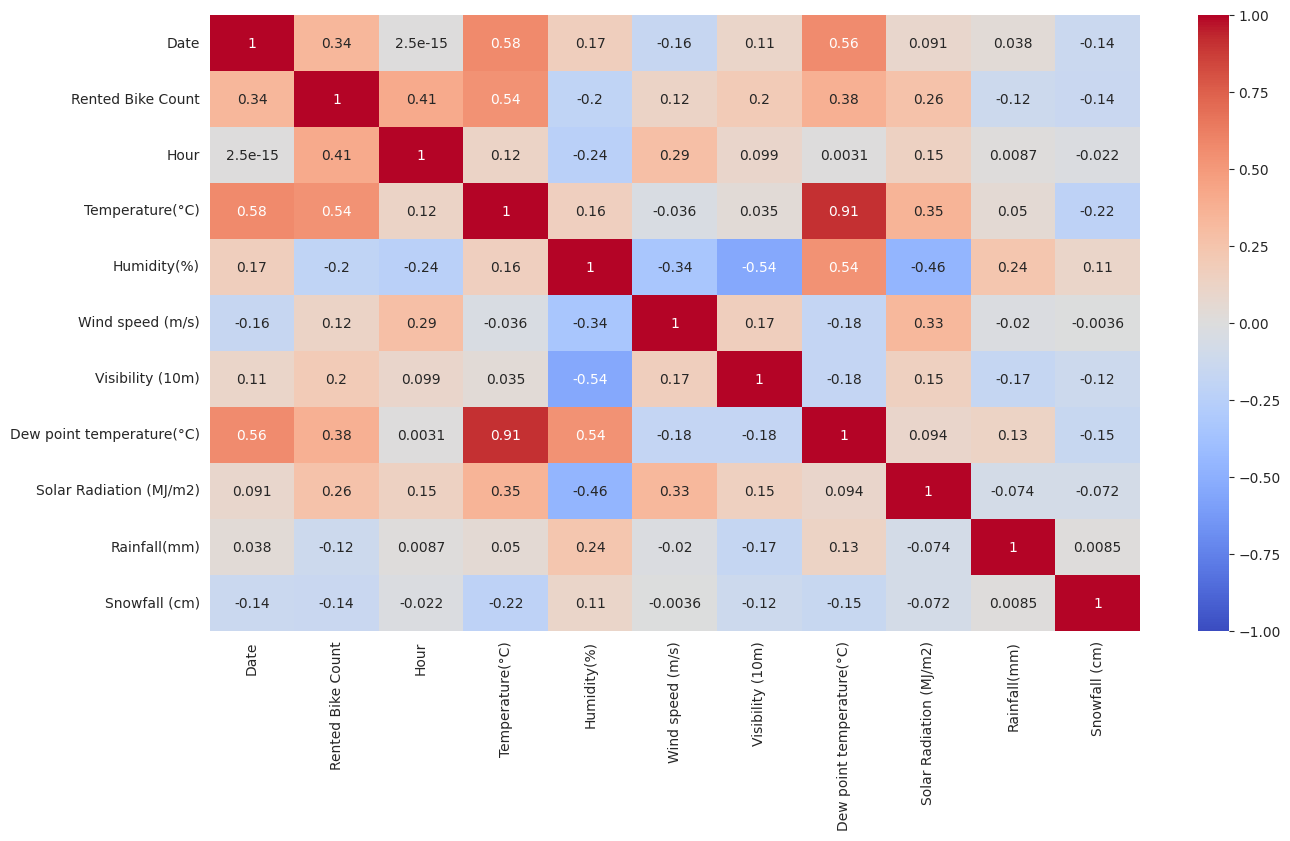

In [ ]:
# Plotting a correlation heatmap for the dataset
plt.figure(figsize=(15,8))
correlation=numerical_variables_df.corr()
sns.heatmap(correlation, vmin=-1, cmap='coolwarm', annot=True) #need to construct it without date
plt.show()

**Observations :**
- Dew point temperature (°C) and temperature (°C) have a strong correlation. A moderate correlation exists between humidity (%) and dew point temperature (°C).

##### **<u>Variance inflation factor(VIF)<u>**

In [ ]:
# Variance inflation factor(VIF) to detects multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [ ]:
# Calculating Variance inflation factor for dataset
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

variables         VIF
0                        Hour    4.458189
1             Temperature(°C)  187.398377
2                 Humidity(%)  188.980829
3            Wind speed (m/s)    9.776335
4            Visibility (10m)    3.928065
5   Dew point temperature(°C)  126.449329
6     Solar Radiation (MJ/m2)    3.247160
7                Rainfall(mm)    1.238013
8               Snowfall (cm)    1.201201
9                         day    4.357153
10                      month    5.139632
11                       year  371.089228

- Variable year have a high variance inflation factor, so we can remove it.

In [ ]:
# Dropping year feature to reduce Variance inflation factor
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','year']]])

variables        VIF
0                        Hour   4.441471
1             Temperature(°C)  26.522858
2                 Humidity(%)  13.708619
3            Wind speed (m/s)   9.623113
4            Visibility (10m)   3.905894
5   Dew point temperature(°C)  13.301723
6     Solar Radiation (MJ/m2)   3.226481
7                Rainfall(mm)   1.172258
8               Snowfall (cm)   1.188108
9                         day   4.311702
10                      month   5.090815

- Variable Temperature(°C), Humidity(%) and Dew point temperature(°C) have a high variance inflation factor, so we can remove Dew point temperature(°C) variable to reduce VIF.

In [ ]:
# Dropping 'Dew point temperature(°C)' feature to reduce Variance inflation factor
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','year','Dew point temperature(°C)']]])

variables        VIF
0                     Hour   4.083679
1          Temperature(°C)   3.466216
2              Humidity(%)  12.811837
3         Wind speed (m/s)   7.555983
4         Visibility (10m)   3.866969
5  Solar Radiation (MJ/m2)   2.799413
6             Rainfall(mm)   1.147084
7            Snowfall (cm)   1.173493
8                      day   3.821403
9                    month   4.725804

- Variable 'Humidity(%)' have a high variance inflation factor, so we can remove it.

In [ ]:
# Dropping 'Dew point temperature(°C)' feature to reduce Variance inflation factor
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','year','Dew point temperature(°C)', 'Humidity(%)']]])

variables       VIF
0                     Hour  4.076513
1          Temperature(°C)  2.878029
2         Wind speed (m/s)  6.151327
3         Visibility (10m)  2.375840
4  Solar Radiation (MJ/m2)  2.117239
5             Rainfall(mm)  1.113558
6            Snowfall (cm)  1.160271
7                      day  3.719688
8                    month  3.816465

In [ ]:
# Dropping 'Wind speed' feature to reduce Variance inflation factor
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','year','Dew point temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)']]])

variables       VIF
0                     Hour  3.106688
1          Temperature(°C)  2.862531
2         Visibility (10m)  2.327290
3  Solar Radiation (MJ/m2)  1.831029
4             Rainfall(mm)  1.113015
5            Snowfall (cm)  1.160064
6                      day  3.410148
7                    month  3.613576

- From above, variables year,Dew point temperature(°C), and Humidity(%) have a high variance inflation factor, so we can remove them.

In [ ]:
# Drop high VIF variables from dataset
df.drop(columns=['year','Dew point temperature(°C)', 'Humidity(%)','Wind speed (m/s)'], axis=1,inplace=True)

In [ ]:
# Checking dataset
df.head()

Rented Bike Count  Hour  Temperature(°C)  Visibility (10m)  \
0          15.968719     0             -5.2               1.0   
1          14.317821     1             -5.5               1.0   
2          13.190906     2             -6.0               1.0   
3          10.392305     3             -6.2               1.0   
4           8.888194     4             -6.0               1.0   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  day  month  
0             Yes    1     12  
1             Yes    1     12  
2             Yes    1     12  
3             Yes    1     12  
4             Yes    1     12

.

#### **<i>[4] Features encoding<i>**

In [ ]:
# Addressing categorical variables from the dataset
categorical_variables=df.describe(include=['object']).columns
categorical_variables

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [ ]:
# Checking categories in each categorical features
for var in categorical_variables:
    print(df[var].value_counts())
    print('--'*50)

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Functioning Day
Yes    8465
No      295
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


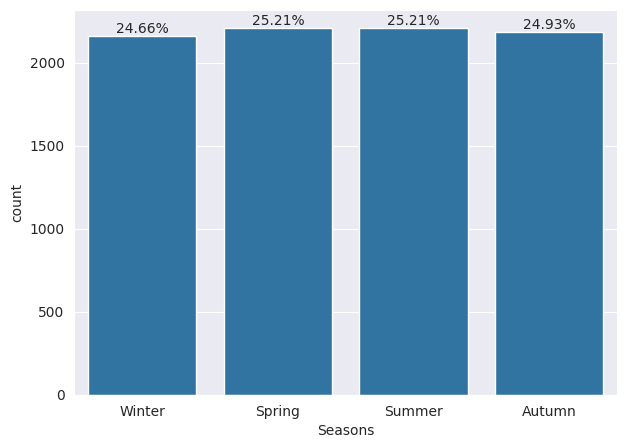

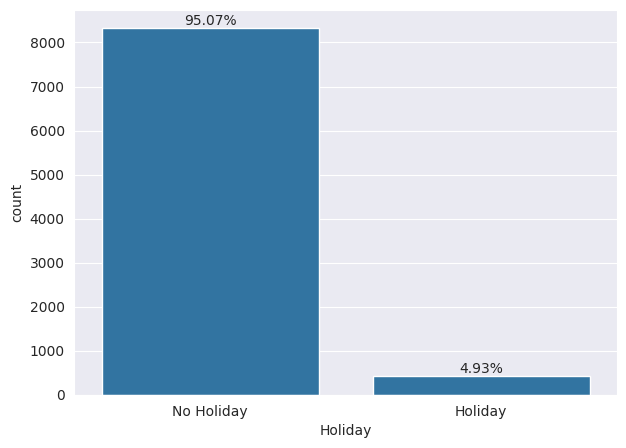

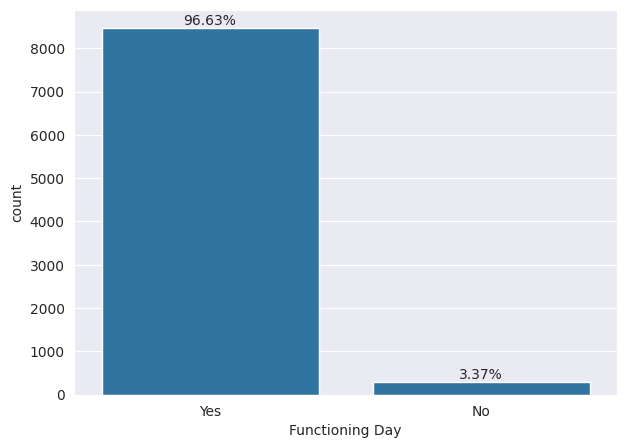

In [ ]:
# Plotting count plot for each categories in categorical_variables
for var in categorical_variables:
    plt.figure(figsize=(7,5))
    plot=plt.subplot(111)
    ax=sns.countplot(x=df[var])
    annot_percent(plot)
    plt.show()

- Because categorical variables have a limited number of categories, label encoding can be used instead of one-hot encoding. One hot encoding is used when there are quite large categories in categorical variables.

In [ ]:
# Encoding categorical_variables using label encoding
# Mapping the categorical variables
df['Seasons'] = df['Seasons'].map({'Spring':1,'Summer':2,'Autumn':3,'Winter':4})
df['Holiday'] = df['Holiday'].map({'No Holiday':0,'Holiday':1})
df['Functioning Day'] = df['Functioning Day'].map({'Yes':1,'No':0})

In [ ]:
# Checking basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   float64
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Visibility (10m)         8760 non-null   float64
 4   Solar Radiation (MJ/m2)  8760 non-null   float64
 5   Rainfall(mm)             8760 non-null   float64
 6   Snowfall (cm)            8760 non-null   float64
 7   Seasons                  8760 non-null   int64  
 8   Holiday                  8760 non-null   int64  
 9   Functioning Day          8760 non-null   int64  
 10  day                      8760 non-null   int32  
 11  month                    8760 non-null   int32  
dtypes: float64(6), int32(2), int64(4)
memory usage: 752.9 KB


In [ ]:
# Final Dataset
df.head()

Rented Bike Count  Hour  Temperature(°C)  Visibility (10m)  \
0          15.968719     0             -5.2               1.0   
1          14.317821     1             -5.5               1.0   
2          13.190906     2             -6.0               1.0   
3          10.392305     3             -6.2               1.0   
4           8.888194     4             -6.0               1.0   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  \
0                      0.0           0.0            0.0        4        0   
1                      0.0           0.0            0.0        4        0   
2                      0.0           0.0            0.0        4        0   
3                      0.0           0.0            0.0        4        0   
4                      0.0           0.0            0.0        4        0   

   Functioning Day  day  month  
0                1    1     12  
1                1    1     12  
2                1    1     12  
3                1    1     12  
4                1    1     12

- This is the final dataset we will use to build a machine learning model.

.

#### **<i>[5] Data Splitting<i>**

In [ ]:
# Separating independant variables and dependant variable

# Creating the dataset with all dependent variables
dependent_variable = 'Rented Bike Count'

# Creating the dataset with all independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

# Create the data of independent variables
X = df[independent_variables].values
# Create the data of dependent variable
y = df[dependent_variable].values

In [ ]:
# Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42) # 1) do we need to do random splitting or linear splitting? 2) Why gridsearch cv is used?

In [ ]:
# Checking shape of split
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (7008, 11)
Shape of X_test : (1752, 11)
Shape of y_train : (7008,)
Shape of y_test : (1752,)


- We divided the dataset into 20% for model testing and 80% for training.

In [ ]:
# Checking values of splitted dataset
X_train[0:5]

array([[ 0.        ,  1.        , 11.        , 15.        , 13.2       ,
        35.80502758,  0.        ,  0.        ,  0.70803579,  3.        ,
        16.        ],
       [ 0.        ,  1.        ,  6.        ,  9.        , 22.9       ,
        38.249183  ,  0.        ,  0.        ,  0.56531381,  2.        ,
        29.        ],
       [ 0.        ,  1.        , 11.        , 19.        , 11.2       ,
        33.64520768,  0.        ,  0.        ,  0.        ,  3.        ,
        15.        ],
       [ 0.        ,  1.        ,  2.        , 23.        , -2.6       ,
        23.8117618 ,  0.        ,  0.        ,  0.        ,  4.        ,
         2.        ],
       [ 0.        ,  1.        ,  7.        , 22.        , 27.2       ,
        31.55946768,  0.        ,  0.        ,  0.        ,  2.        ,
        18.        ]])

In [ ]:
# Checking values of splitted dataset
X_test[0:5]

array([[ 0.        ,  1.        ,  8.        ,  8.        , 27.2       ,
         1.41421356,  0.        ,  0.        ,  0.53062825,  2.        ,
        10.        ],
       [ 0.        ,  1.        ,  7.        , 12.        , 32.6       ,
        34.6554469 ,  0.        ,  0.        ,  1.20146967,  2.        ,
        20.        ],
       [ 0.        ,  1.        ,  8.        , 14.        , 34.        ,
        16.03121954,  0.        ,  0.        ,  0.98581679,  2.        ,
         7.        ],
       [ 0.        ,  1.        , 10.        , 18.        , 16.9       ,
        19.07878403,  0.        ,  0.        ,  0.10436002,  3.        ,
        16.        ],
       [ 0.        ,  1.        ,  4.        ,  7.        ,  6.4       ,
        24.55605832,  0.        ,  0.        ,  0.17395331,  1.        ,
        18.        ]])

.

#### **<i>[6] Data Scaling<i>**

In [ ]:
#Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- MinMaxScaler preserves the shape of the original distribution. It doesn't meaningfully change the information embedded in the original data. So we used MinMaxScaler for scaling the dataset.

In [ ]:
# Checking values of splitted dataset after normalisation
X_train[0:5]

array([[0.        , 1.        , 0.90909091, 0.65217391, 0.54195804,
        0.80265925, 0.        , 0.        , 0.58930809, 0.66666667,
        0.5       ],
       [0.        , 1.        , 0.45454545, 0.39130435, 0.71153846,
        0.85902536, 0.        , 0.        , 0.47051858, 0.33333333,
        0.93333333],
       [0.        , 1.        , 0.90909091, 0.82608696, 0.50699301,
        0.75285037, 0.        , 0.        , 0.        , 0.66666667,
        0.46666667],
       [0.        , 1.        , 0.09090909, 1.        , 0.26573427,
        0.52607548, 0.        , 0.        , 0.        , 1.        ,
        0.03333333],
       [0.        , 1.        , 0.54545455, 0.95652174, 0.78671329,
        0.70474989, 0.        , 0.        , 0.        , 0.33333333,
        0.56666667]])

In [ ]:
# Checking values of splitted dataset after normalisation
X_test[0:5]

array([[0.        , 1.        , 0.63636364, 0.34782609, 0.78671329,
        0.00955242, 0.        , 0.        , 0.44164931, 0.33333333,
        0.3       ],
       [0.        , 1.        , 0.54545455, 0.52173913, 0.88111888,
        0.77614809, 0.        , 0.        , 1.        , 0.33333333,
        0.63333333],
       [0.        , 1.        , 0.63636364, 0.60869565, 0.90559441,
        0.34664381, 0.        , 0.        , 0.82050909, 0.33333333,
        0.2       ],
       [0.        , 1.        , 0.81818182, 0.7826087 , 0.60664336,
        0.41692549, 0.        , 0.        , 0.0868603 , 0.66666667,
        0.5       ],
       [0.        , 1.        , 0.27272727, 0.30434783, 0.42307692,
        0.54324014, 0.        , 0.        , 0.14478377, 0.        ,
        0.56666667]])

.

## **<u>ML Model Implementation<u>**

In [ ]:
# Definig function for evaluating model

# Importing necessary librery
from sklearn import metrics
#Evaluate Metrics
def evaluate_model(true, predicted):
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    mae = metrics.mean_absolute_error(true, predicted)
    r2_square = metrics.r2_score(true, predicted)
    print('Mean squared error (MSE):', mse)
    print('Root mean squared error (RMSE):', rmse)
    print('Mean absolute error (MAE):', mae)
    print('R2 Square', r2_square) # need to check
    print('____________________________________')

.

### **[1] Linear Regression**

#### [1.1] train_test_split

In [ ]:
# Fitting Regression model to training set
from sklearn.linear_model import LinearRegression
lin_reg_tts = LinearRegression()
lin_reg_tts.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Score of the model
lin_reg_tts_score=lin_reg_tts.score(X_train, y_train)
print(f'Score of the model : {lin_reg_tts_score}')

Score of the model : 0.6457913080561853


In [ ]:
# Intercept
lin_reg_tts.intercept_

-20.653718276277026

In [ ]:
# Coefficients
lin_reg_tts.coef_

array([-39.46833613,  25.95213562,   4.82125691,  13.06334961,
        24.03968845,  -3.33853796,  -3.45567827,  -5.52446937,
         2.84403017,  -3.43858351,   0.62765822])

In [ ]:
# Predicting results for train and test set
y_train_pred_tts=lin_reg_tts.predict(X_train)
y_test_pred_tts=lin_reg_tts.predict(X_test)

In [ ]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred_tts)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred_tts)

Training set evaluation result
____________________________________
Mean squared error (MSE): 53.20659351092649
Root mean squared error (RMSE): 7.294284989697516
Mean absolute error (MAE): 5.684599109534521
R2 Square 0.6457913080561853
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 54.95189719509499
Root mean squared error (RMSE): 7.4129546872414505
Mean absolute error (MAE): 5.713927315678236
R2 Square 0.6309125066108602
____________________________________


In [ ]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred_tts)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred_tts)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train set evaluation result
____________________________________
Adjusted R2 :  0.6452343761506134
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.6285791948710437


In [ ]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred_tts
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.18345962473197605


**Note :-** Mean of Residuals is very very close to zero, so all good here.

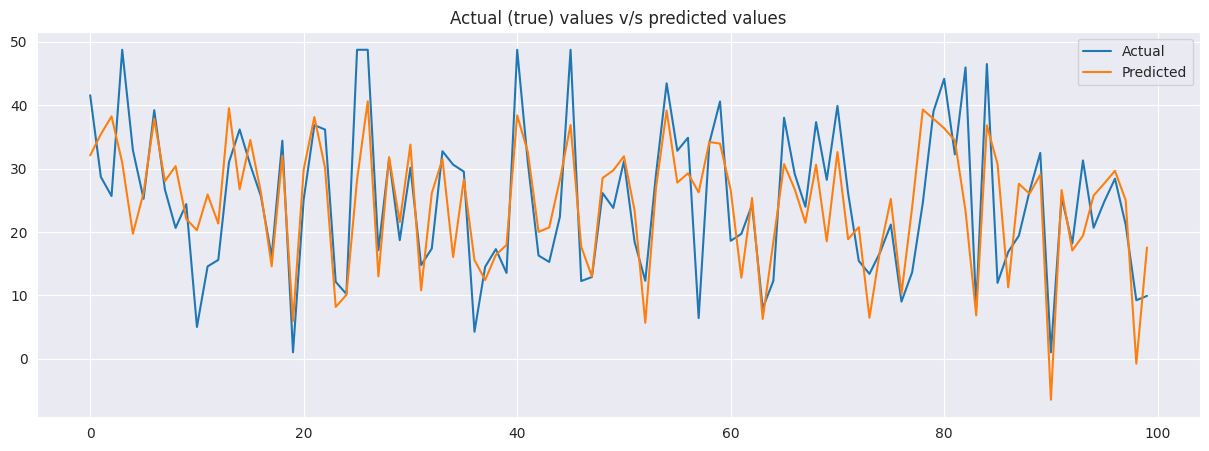

In [ ]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred_tts[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

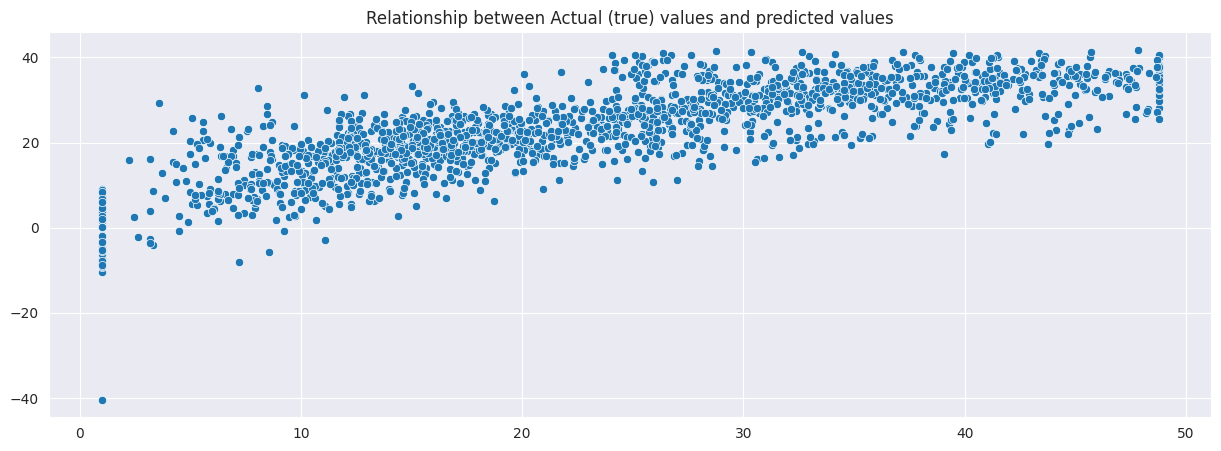

In [ ]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
sns.scatterplot(x=y_test, y=y_test_pred_tts)
plt.title('Relationship between Actual (true) values and predicted values')
plt.show()

- We get the conclusion that the linear model fails to perform well based on the above model score and graph.
- Model provided only 62% of the performance score, and the mean of the residual was not close to zero, indicating that the model was not well trained to make predictions.

.

### **[2] Lasso Regression (L1)**

#### Cross Validation

In [ ]:
# Fitting lasso regression model to training set
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0001 , max_iter= 3000, random_state=0)
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_reg = GridSearchCV(lasso, parameters, verbose=1, scoring='neg_mean_squared_error', cv=10)
lasso_reg.fit(X_train, y_train)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


GridSearchCV(cv=10,
             estimator=Lasso(alpha=0.0001, max_iter=3000, random_state=0),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# Best estimators
lasso_reg_best_est=lasso_reg.best_estimator_
print(f'The best estimator values : {lasso_reg_best_est}')

The best estimator values : Lasso(alpha=0.001, max_iter=3000, random_state=0)


In [ ]:
# best fit alpha value
lasso_reg_best_params=lasso_reg.best_params_
print(f'The best fit alpha value : {lasso_reg_best_params}')

The best fit alpha value : {'alpha': 0.001}


In [ ]:
# Mean cross-validated score of the best_estimator of model
lasso_reg_score=lasso_reg.best_score_
print(f" The negative mean squared error is: {lasso_reg_score}")

 The negative mean squared error is: -53.3837438289713


In [ ]:
# Predicting results for train and test set
y_train_pred=lasso_reg.predict(X_train)
y_test_pred=lasso_reg.predict(X_test)

In [ ]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred)

Training set evaluation result
____________________________________
Mean squared error (MSE): 53.20699377714927
Root mean squared error (RMSE): 7.294312426620433
Mean absolute error (MAE): 5.685123644328395
R2 Square 0.6457886433906647
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 54.94267929351452
Root mean squared error (RMSE): 7.412332918421469
Mean absolute error (MAE): 5.71387120571143
R2 Square 0.6309744191627883
____________________________________


In [ ]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train set evaluation result
____________________________________
Adjusted R2 :  0.645231707295367
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.6286414988241622


In [ ]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.1837075424491897


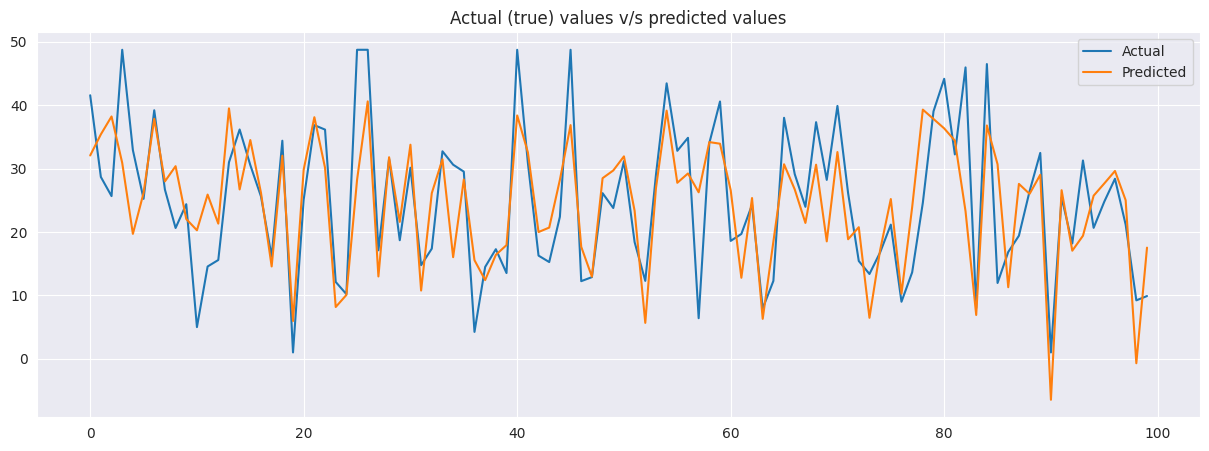

In [ ]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

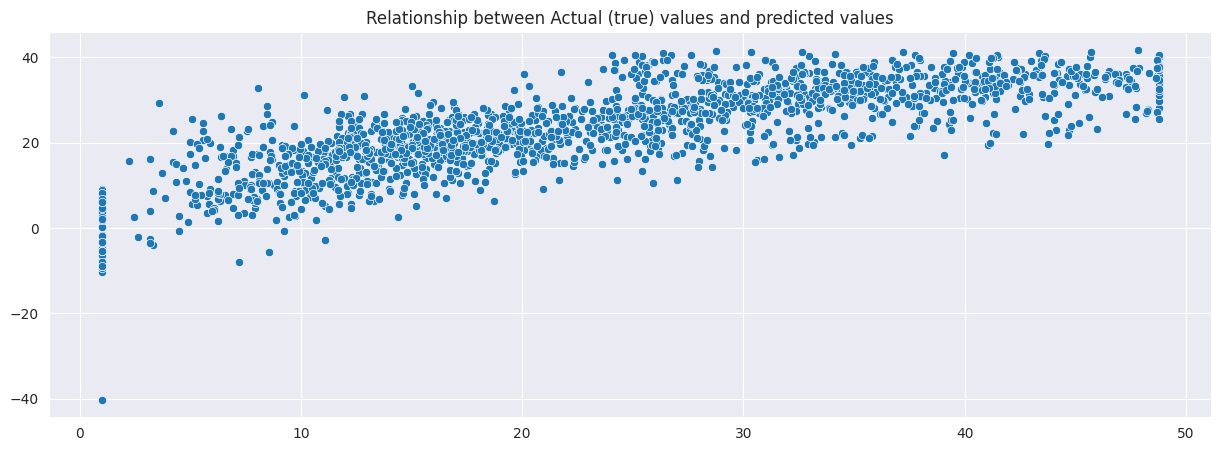

In [ ]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.title('Relationship between Actual (true) values and predicted values')
plt.show()

- The Lasso (L1) regression model gave the same performance as the above linear regression model.
- The relationship between actual and predicted values suggests that the model has been slightly improved.
- The model provided only 62% of the performance score, and the mean of the residual was not close to zero, indicating that the model was not well trained to make predictions.

.

### **[3] Ridge Regression (L2)**

#### Cross Validation

In [ ]:
# Fitting ridge regression model to training set
from sklearn.linear_model import Ridge
ridge = Ridge(random_state=0)
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
ridge_reg = GridSearchCV(ridge, parameters, verbose=1, scoring='neg_mean_squared_error', cv=5)
ridge_reg.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, estimator=Ridge(random_state=0),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# Best estimators
ridge_reg_best_est=ridge_reg.best_estimator_
print(f'The best estimator values : {ridge_reg_best_est}')

The best estimator values : Ridge(alpha=1, random_state=0)


In [ ]:
# best fit alpha value
ridge_reg_best_params=ridge_reg.best_params_
print(f'The best fit alpha value : {ridge_reg_best_params}')

The best fit alpha value : {'alpha': 1}


In [ ]:
# Mean cross-validated score of the best_estimator of model
ridge_reg_score=ridge_reg.best_score_
print(f" The negative mean squared error is: {ridge_reg_score}")

 The negative mean squared error is: -53.44739299414105


In [ ]:
# Predicting results for train and test set
y_train_pred=ridge_reg.predict(X_train)
y_test_pred=ridge_reg.predict(X_test)

In [ ]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred)

Training set evaluation result
____________________________________
Mean squared error (MSE): 53.21320132030218
Root mean squared error (RMSE): 7.294737919918863
Mean absolute error (MAE): 5.687058386555064
R2 Square 0.6457473183293276
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 54.942634464720705
Root mean squared error (RMSE): 7.412329894488015
Mean absolute error (MAE): 5.715236509790583
R2 Square 0.6309747202578913
____________________________________


In [ ]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train set evaluation result
____________________________________
Adjusted R2 :  0.6451903172575184
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.62864180182274


In [ ]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.1835048617961943


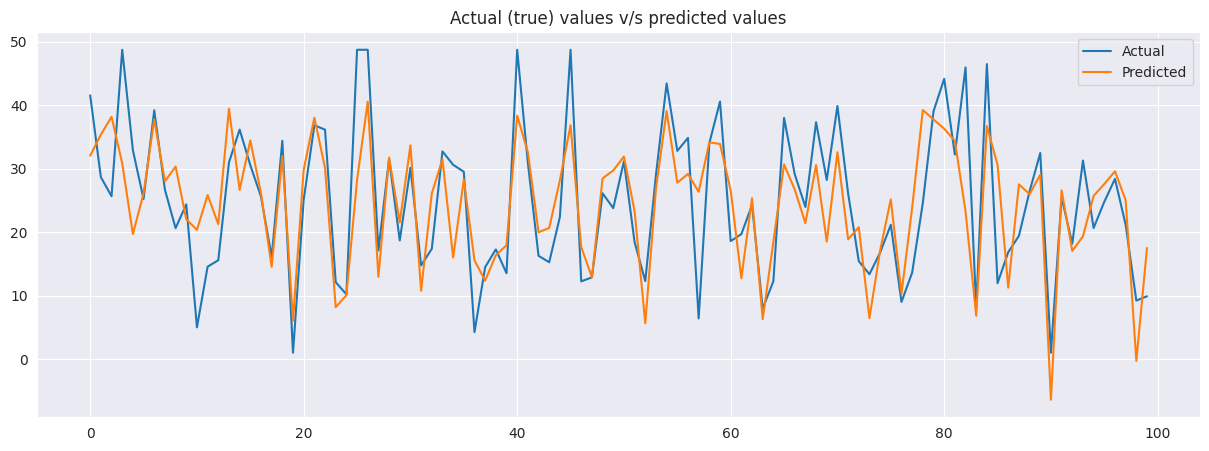

In [ ]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

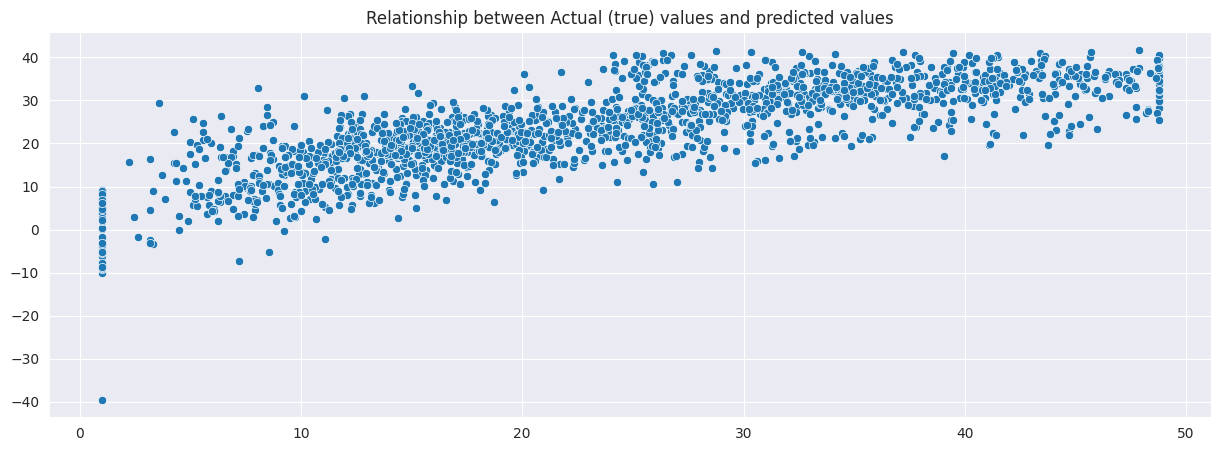

In [ ]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.title('Relationship between Actual (true) values and predicted values')
plt.show()

- The Ridge (L2) regression model gave the same performance as the above linear and lasso regression models.
- The relationship between actual and predicted values suggests that the model has been slightly improved.
- The model provided only 62% of the performance score, and the mean of the residual was not close to zero, indicating that the model was not well trained to make predictions.

.

### **[4] ElasticNet Regression**

#### Cross Validation

In [ ]:
# Fitting elasticnet regression model to training set
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(random_state=0)
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
enet_reg = GridSearchCV(elasticnet, parameters, verbose=1, scoring='neg_mean_squared_error', cv=5)
enet_reg.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, estimator=ElasticNet(random_state=0),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# Best estimators
enet_reg_best_est=enet_reg.best_estimator_
print(f'The best estimator values : {enet_reg_best_est}')

The best estimator values : ElasticNet(alpha=0.0001, random_state=0)


In [ ]:
# best fit alpha value
enet_reg_best_params=enet_reg.best_params_
print(f'The best fit alpha value : {enet_reg_best_params}')

The best fit alpha value : {'alpha': 0.0001}


In [ ]:
# Mean cross-validated score of the best_estimator of model
enet_reg_score=enet_reg.best_score_
print(f" The negative mean squared error is: {enet_reg_score}")

 The negative mean squared error is: -53.44778370289988


In [ ]:
# Predicting results for train and test set
y_train_pred=enet_reg.predict(X_train)
y_test_pred=enet_reg.predict(X_test)

In [ ]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred)

Training set evaluation result
____________________________________
Mean squared error (MSE): 53.20747414324554
Root mean squared error (RMSE): 7.294345353987946
Mean absolute error (MAE): 5.685458521137018
R2 Square 0.6457854454816202
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 54.94649897977859
Root mean squared error (RMSE): 7.412590571438476
Mean absolute error (MAE): 5.714355160512366
R2 Square 0.6309487640261926
____________________________________


In [ ]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train set evaluation result
____________________________________
Adjusted R2 :  0.6452285043581636
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.6286156814999213


In [ ]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.1834870569209947


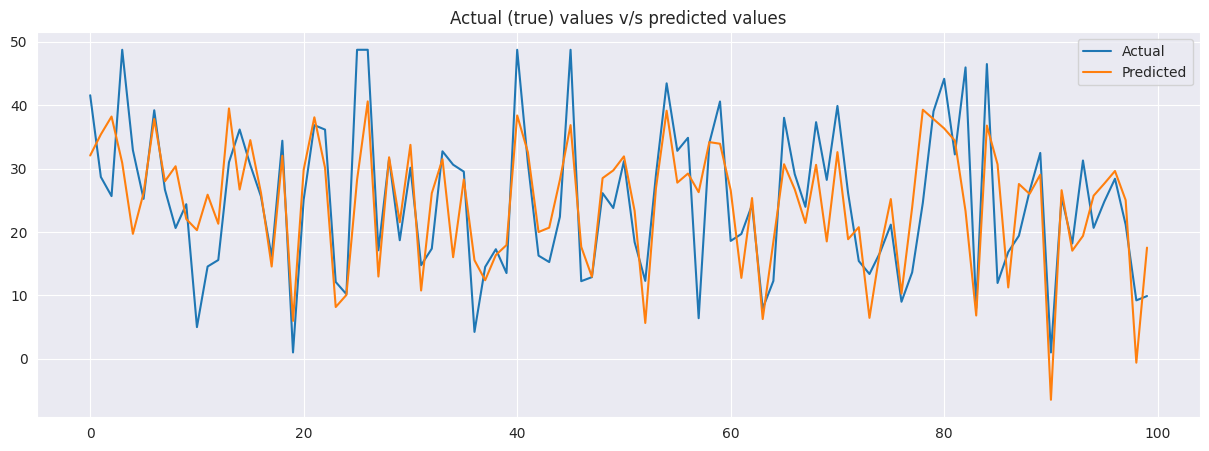

In [ ]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

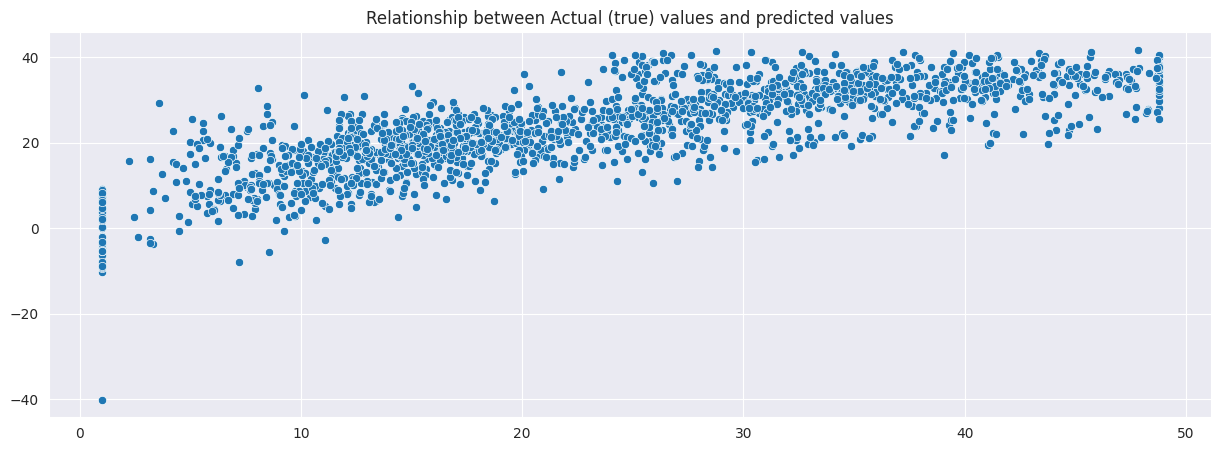

In [ ]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.title('Relationship between Actual (true) values and predicted values')
plt.show()

- The Ridge (L2) regression model gave the same performance as the above linear and lasso regression models.
- The relationship between actual and predicted values looks more linear, suggesting that the model has been slightly improved.
- The model provided only 62% of the performance score, and the mean of the residual was not close to zero, indicating that the model was not well trained to make predictions.

.

### **[5] Decision Tree**

#### train_test_split

In [ ]:
# Fitting Decision tree Regression model to training set
from sklearn.tree import DecisionTreeRegressor
dtree_tts=DecisionTreeRegressor(criterion='squared_error',max_leaf_nodes=10, random_state=0)
dtree_tts.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10, random_state=0)

In [ ]:
# Score of the model
dtree_tts_score=dtree_tts.score(X_train, y_train)
print(f'Score of the model : {dtree_tts_score}')

Score of the model : 0.7217408060761781


In [ ]:
# Predicting results for train and test set
y_train_pred_tts=dtree_tts.predict(X_train)
y_test_pred_tts=dtree_tts.predict(X_test)

In [ ]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred_tts)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred_tts)

Training set evaluation result
____________________________________
Mean squared error (MSE): 41.798025171362255
Root mean squared error (RMSE): 6.465139222890893
Mean absolute error (MAE): 4.880238891112916
R2 Square 0.7217408060761781
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 42.74620140910456
Root mean squared error (RMSE): 6.5380579233519
Mean absolute error (MAE): 4.916573458097293
R2 Square 0.7128927455592564
____________________________________


In [ ]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred_tts)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred_tts)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train set evaluation result
____________________________________
Adjusted R2 :  0.721303291620323
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.7110776996978494


In [ ]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred_tts
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.2473690186619182


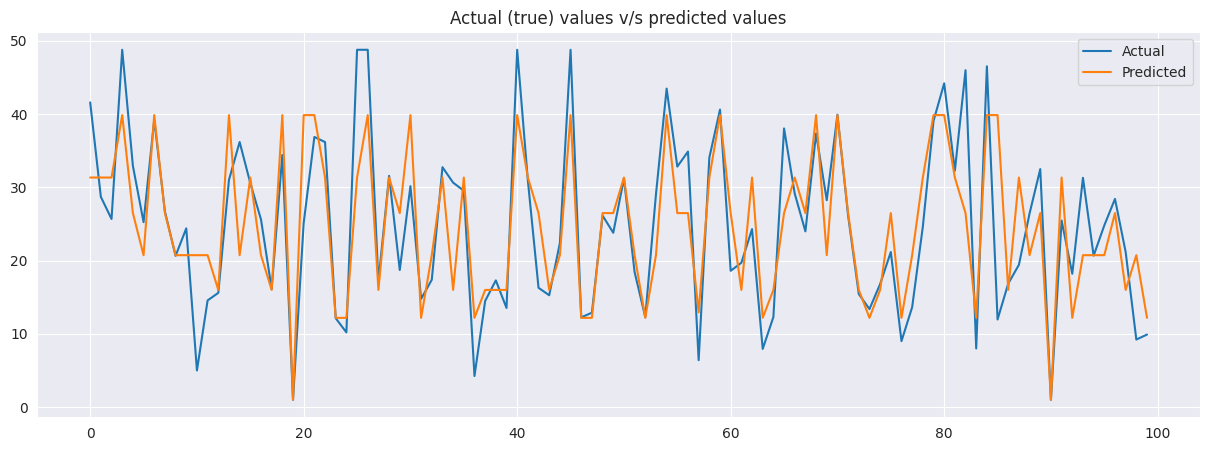

In [ ]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred_tts[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

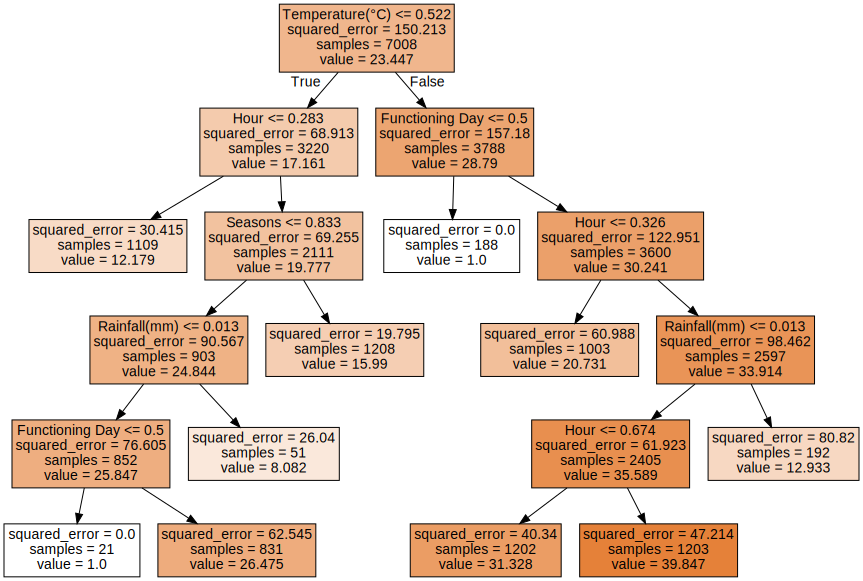

In [ ]:
# Visulaizing Decision Tree

# Importing libraries
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# Visualizing graph
graph = Source(tree.export_graphviz(dtree_tts, out_file=None
   , feature_names=df[independent_variables].columns
   , filled = True))
display(SVG(graph.pipe(format='svg')))

- Model Decision Tree using train test split performs well based on the above model score and graph.

#### Cross Validation

In [ ]:
# Fitting Decision tree regression model to training set
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0)
param_dict = {'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
dtree_reg = GridSearchCV(dtree, param_dict, verbose=1, scoring='neg_mean_squared_error', cv=5)
dtree_reg.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# Best estimators
dtree_reg_best_est=dtree_reg.best_estimator_
print(f'The best estimator values : {dtree_reg_best_est}')

The best estimator values : DecisionTreeRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50,
                      random_state=0)


In [ ]:
# best fit values
dtree_reg_best_params=dtree_reg.best_params_
print(f'The best fit values: {dtree_reg_best_params}')

The best fit values: {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50}


In [ ]:
# Mean cross-validated score of the best_estimator of model
dtree_reg_score=dtree_reg.best_score_
print(f" The negative mean squared error is: {dtree_reg_score}")

 The negative mean squared error is: -32.5862869384005


In [ ]:
# Predicting results for train and test set
y_train_pred=dtree_reg.predict(X_train)
y_test_pred=dtree_reg.predict(X_test)

In [ ]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred)

Training set evaluation result
____________________________________
Mean squared error (MSE): 25.937913705659398
Root mean squared error (RMSE): 5.092927812728097
Mean absolute error (MAE): 3.551458450170833
R2 Square 0.8273252640474638
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 31.13331442488181
Root mean squared error (RMSE): 5.5797235079241885
Mean absolute error (MAE): 3.8521566321025684
R2 Square 0.7908913510086917
____________________________________


In [ ]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train set evaluation result
____________________________________
Adjusted R2 :  0.8270537628903056
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.7895693997794363


In [ ]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.19268496619689404


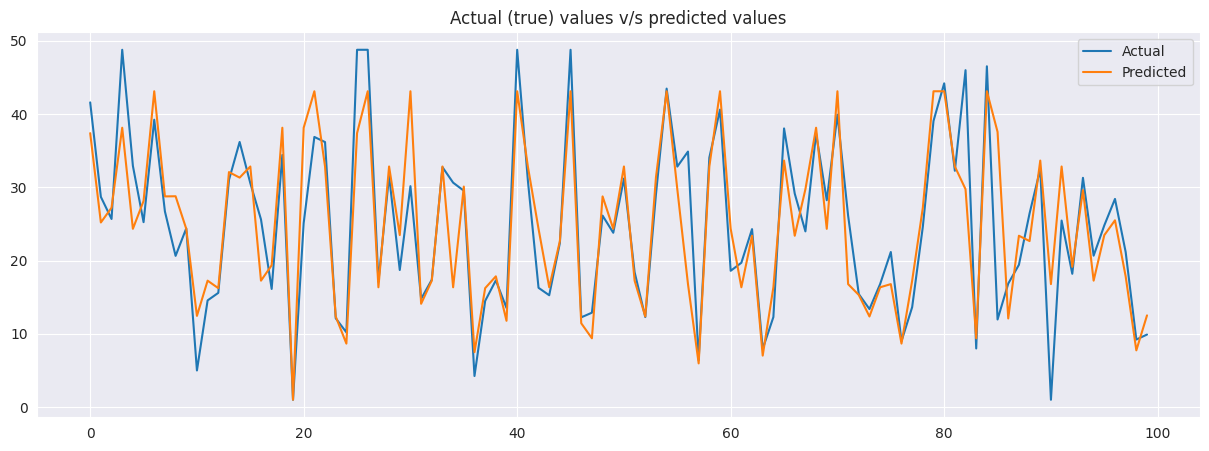

In [ ]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

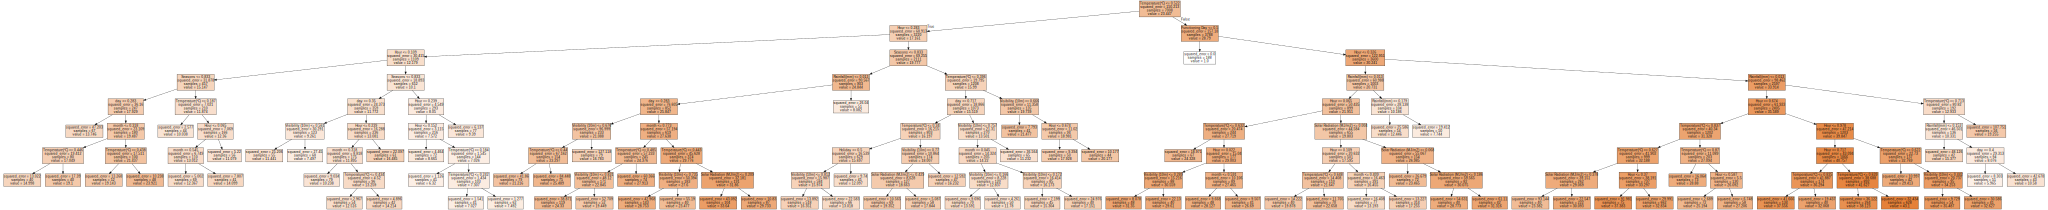

In [ ]:
# Visulaizing Decision Tree

# Importing libraries
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# Visualizing graph
graph = Source(tree.export_graphviz(dtree_reg.best_estimator_, out_file=None
   , feature_names=df[independent_variables].columns
   , filled = True))
display(SVG(graph.pipe(format='svg')))

- The decision tree regression model is well trained than other Linear regression, Lasso, Ridge, and ElasticNet regression models.
- Cross validation and hyperparameter tuning improved the decision tree model's performance and reduced error more than train_test_split.
- A model decision tree using GridSearchCV performs well based on the above model score and graph.

.

### [6] Random Forest

#### train_test_split

In [ ]:
# Fitting Random Forest Regression model to training set
from sklearn.ensemble import RandomForestRegressor
rf_tts=RandomForestRegressor(criterion='squared_error',max_leaf_nodes=10, random_state=0)
rf_tts.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=10, random_state=0)

In [ ]:
# Score of the model
rf_tts_score=rf_tts.score(X_train, y_train)
print(f'Score of the model : {rf_tts_score}')

Score of the model : 0.7535527693815874


In [ ]:
# Predicting results for train and test set
y_train_pred_tts=rf_tts.predict(X_train)
y_test_pred_tts=rf_tts.predict(X_test)

In [ ]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred_tts)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred_tts)

Training set evaluation result
____________________________________
Mean squared error (MSE): 37.01946880368307
Root mean squared error (RMSE): 6.084362645641947
Mean absolute error (MAE): 4.655871235461315
R2 Square 0.7535527693815874
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 38.19678484777231
Root mean squared error (RMSE): 6.18035475096473
Mean absolute error (MAE): 4.741650537590825
R2 Square 0.7434491565425526
____________________________________


In [ ]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred_tts)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred_tts)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train set evaluation result
____________________________________
Adjusted R2 :  0.753165273735961
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.7418272833942584


In [ ]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred_tts
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.24656429565274898


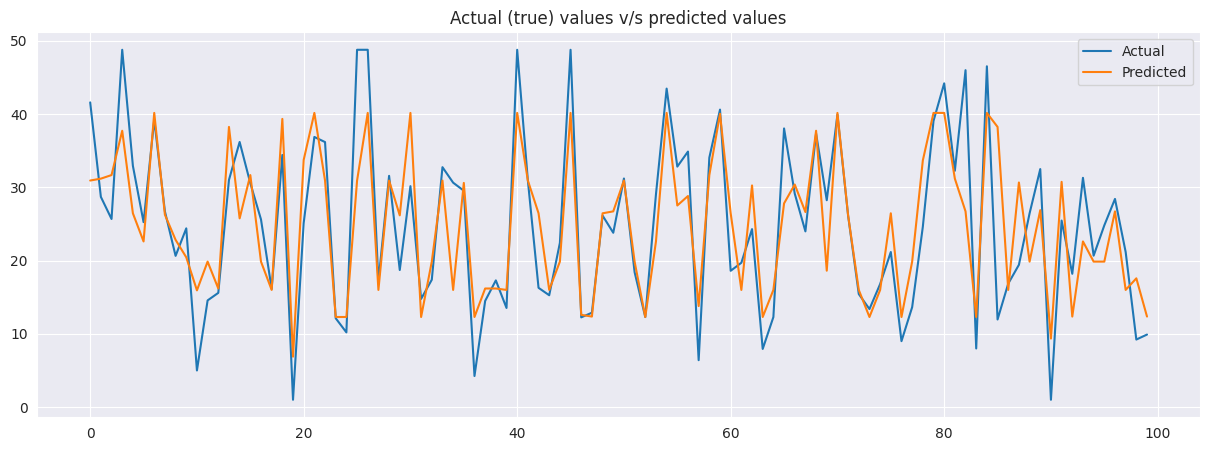

In [ ]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred_tts[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

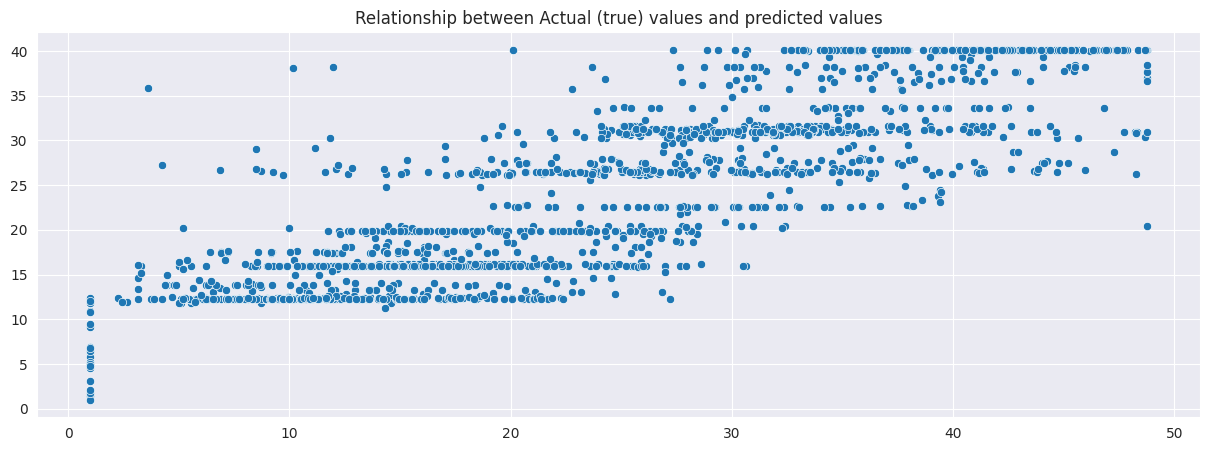

In [ ]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
sns.scatterplot(x=y_test, y=y_test_pred_tts)
plt.title('Relationship between Actual (true) values and predicted values')
plt.show()

- Using train_test_split, we achieved the highest model accuracy compared to the all above models.

#### Cross Validation

In [ ]:
# Fitting Random Forest regression model to training set
from sklearn.ensemble import RandomForestRegressor
rf_cv = RandomForestRegressor(random_state=42)
param_dict = {'n_estimators':[50,80,100],
              'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
rf_reg = GridSearchCV(rf_cv, param_dict, verbose=1, scoring='neg_mean_squared_error', cv=5)
rf_reg.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# Best estimators
rf_reg_best_est=rf_reg.best_estimator_
print(f'The best estimator values : {rf_reg_best_est}')

The best estimator values : RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50,
                      random_state=42)


In [ ]:
# best fit values
rf_reg_best_params=rf_reg.best_params_
print(f'The best fit values: {rf_reg_best_params}')

The best fit values: {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}


In [ ]:
# Mean cross-validated score of the best_estimator of model
rf_reg_score=rf_reg.best_score_
print(f" The negative mean squared error is: {rf_reg_score}")

 The negative mean squared error is: -26.279881711205896


In [ ]:
# Predicting results for train and test set
y_train_pred=rf_reg.predict(X_train)
y_test_pred=rf_reg.predict(X_test)

In [ ]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred)

Training set evaluation result
____________________________________
Mean squared error (MSE): 23.159023566481476
Root mean squared error (RMSE): 4.812382317156595
Mean absolute error (MAE): 3.4148185625945597
R2 Square 0.8458249832796608
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 25.829973192279642
Root mean squared error (RMSE): 5.082319666479042
Mean absolute error (MAE): 3.5988720281786177
R2 Square 0.8265115392467627
____________________________________


In [ ]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train set evaluation result
____________________________________
Adjusted R2 :  0.8455825697313584
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.8254147731155641


In [ ]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.21735997363262743


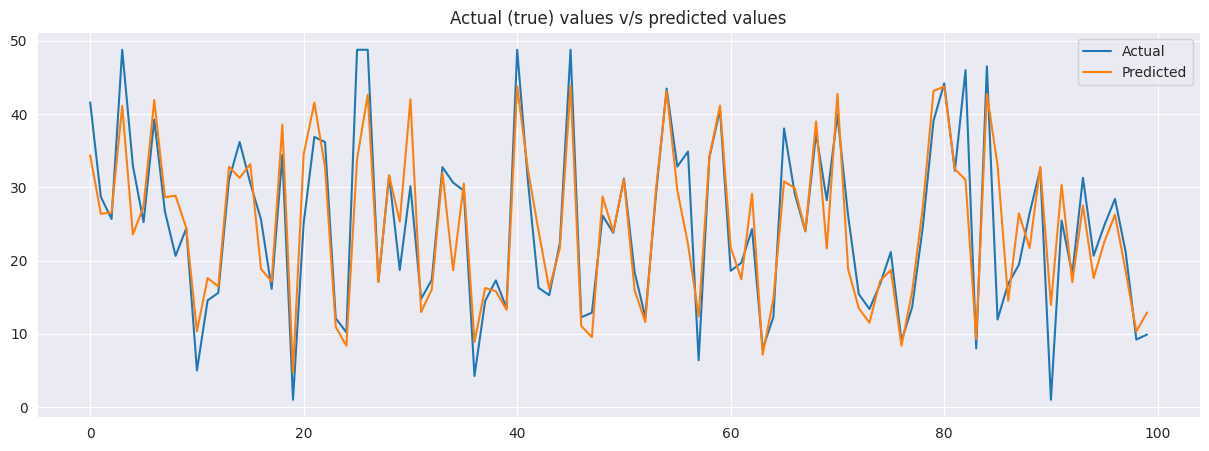

In [ ]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

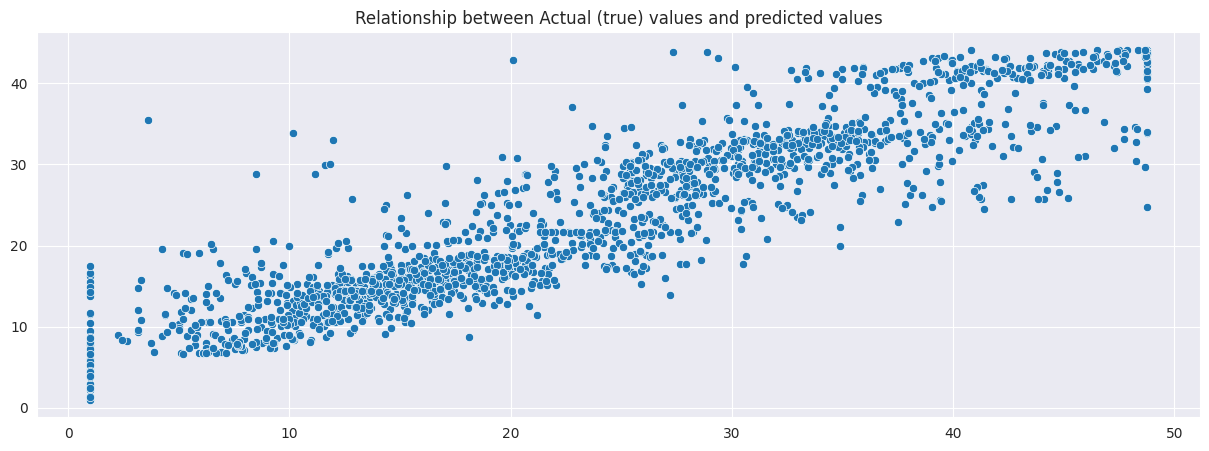

In [ ]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.title('Relationship between Actual (true) values and predicted values')
plt.show()

- The Random Forest regression model is well trained than other Linear regression, Lasso, Ridge, ElasticNet, and Decision tree regression models.
- Cross validation and hyperparameter tuning improved the Random Forest regression model's performance and reduced error more than train_test_split.
- A model Random Forest regression using GridSearchCV performs well based on the above model score and graph.

.

### **[7] XGBoost**

#### Cross Validation

In [ ]:
# Fitting XGBoost regression model to training set
import xgboost as xgb
xgb_cv = xgb.XGBRegressor(random_state=0)

param_dict = {'n_estimators':[50,80,100],
              'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
xgb_reg = GridSearchCV(xgb_cv, param_dict, verbose=1, scoring='neg_mean_squared_error', cv=3)
xgb_reg.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=0, ...),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# Best estimators
xgb_reg_best_est=xgb_reg.best_estimator_
print(f'The best estimator values : {xgb_reg_best_est}')

The best estimator values : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, min_samples_leaf=40, min_samples_split=50,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=100, n_jobs=None, ...)


In [ ]:
# best fit values
xgb_reg_best_params=xgb_reg.best_params_
print(f'The best fit values: {xgb_reg_best_params}')

The best fit values: {'max_depth': 6, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}


In [ ]:
# Mean cross-validated score of the best_estimator of model
xgb_reg_score=xgb_reg.best_score_
print(f" The negative mean squared error is: {xgb_reg_score}")

 The negative mean squared error is: -15.801463295127078


In [ ]:
# Predicting results for train and test set
y_train_pred=xgb_reg.predict(X_train)
y_test_pred=xgb_reg.predict(X_test)

In [ ]:
# Evaluating model
print(f'Training set evaluation result\n____________________________________')
evaluate_model(y_train, y_train_pred)
print(f'Test set evaluation result\n____________________________________')
evaluate_model(y_test, y_test_pred)

Training set evaluation result
____________________________________
Mean squared error (MSE): 3.953169502838781
Root mean squared error (RMSE): 1.9882579065198713
Mean absolute error (MAE): 1.3701097233099917
R2 Square 0.9736828293969778
____________________________________
Test set evaluation result
____________________________________
Mean squared error (MSE): 14.308316853766616
Root mean squared error (RMSE): 3.782633587035178
Mean absolute error (MAE): 2.518883176065503
R2 Square 0.9038973889577431
____________________________________


In [ ]:
# Evaluating Adjusted R2
from sklearn.metrics import r2_score

print(f'Train set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
print('____________________________________')
print(f'Test set evaluation result\n____________________________________')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Train set evaluation result
____________________________________
Adjusted R2 :  0.9736414501979165
____________________________________
Test set evaluation result
____________________________________
Adjusted R2 :  0.9032898437155219


In [ ]:
# Finding mean of Residuals
print(f'Mean of Residuals for test set\n____________________________________')
residuals = y_test-y_test_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals for test set
____________________________________
Mean of Residuals 0.1522202186471379


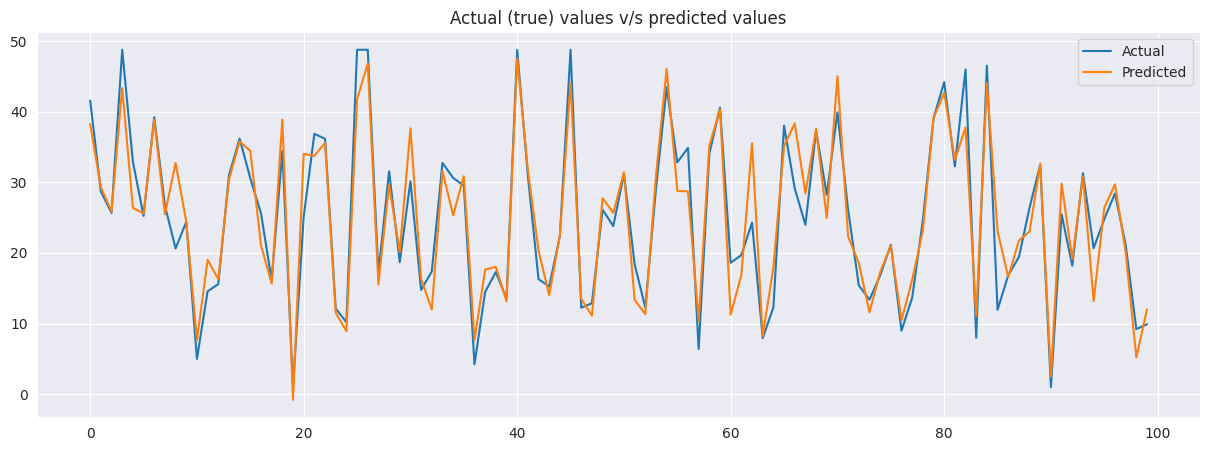

In [ ]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
plt.plot(y_test[0:100])
plt.plot(y_test_pred[0:100])
plt.title('Actual (true) values v/s predicted values')
plt.legend(["Actual", "Predicted"])
plt.show()

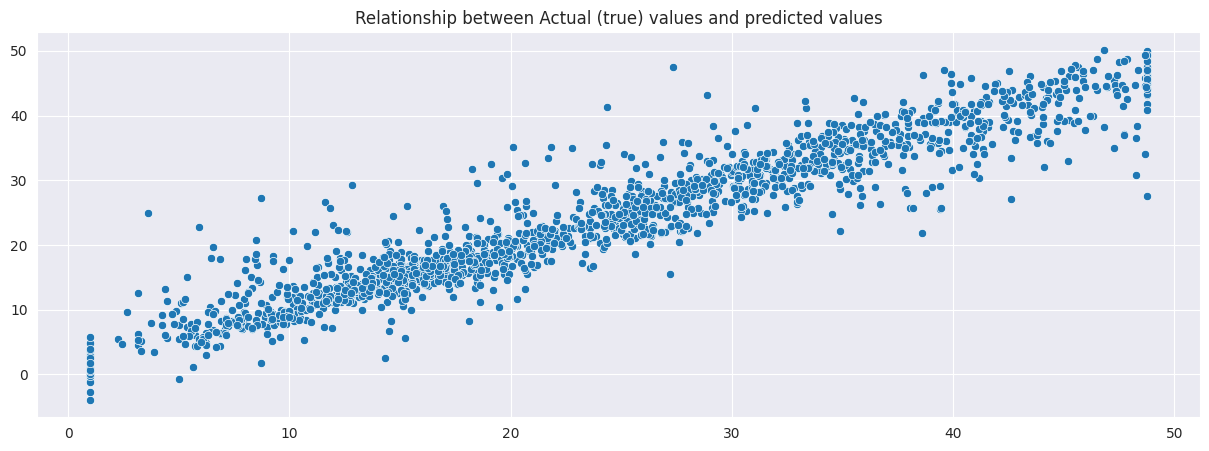

In [ ]:
# Plotting graph of Actual (true) values and predicted values
plt.figure(figsize=(15,5))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.title('Relationship between Actual (true) values and predicted values')
plt.show()

- We got the highest model performance accuracy and lowest mean of residuals using XGBoost compared to all the above Linear regression, Lasso, Ridge, ElasticNet, and Decision tree regression models.
- Cross validation and hyperparameter tuning improved the Random Forest regression model's performance and reduced error more than train_test_split.
- A model XGBoost regression using GridSearchCV performs well based on the above model score and graph.
- Mean of residuals are very very close to zero, means model well fitted and trained.

.

## **<u>Comparing Different Models based on the Evaluation Metrics<u>**

In [ ]:
# import module
from tabulate import tabulate

# Assign data
mydata = [
    ['Linear regression',"56.11071", "7.49070", '5.79057','0.623129','0.6205286','0.184718'],
    ['Lasso (L1)',"56.1015", "7.490094", '5.7906075','0.62319105','0.62059087','0.184956'],
    ['Ridge (L2)',"56.108121", "7.4905354", '5.791172','0.623146','0.6205401','0.184706'],
    ['ElasticNet',"56.1078", "7.49051", '5.79069','0.623148','0.620548','0.184721'],
    ['Decision Tree','31.4790',"5.61062", '3.8559','0.788568','0.787109','0.207377'],
    ['Random Forest',"26.070", "5.1034", '3.6223','0.8248','0.8237','0.2243'],
    ['XGBoost',"13.349", "3.653", '2.364','0.9100','0.9097','0.0629']
]

# Create header for table
head = ['ML Model Name',"MSE", "RMSE", 'MAE','R-squared','Ad. R-squared','Mean of Residuals']

# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))
print('Note : Highest evaluation metric are taken into consideration between train_test_split and cross validation from each model')

+-------------------+---------+---------+---------+-------------+-----------------+---------------------+
| ML Model Name     |     MSE |    RMSE |     MAE |   R-squared |   Ad. R-squared |   Mean of Residuals |
+===================+=========+=========+=========+=============+=================+=====================+
| Linear regression | 56.1107 | 7.4907  | 5.79057 |    0.623129 |        0.620529 |            0.184718 |
+-------------------+---------+---------+---------+-------------+-----------------+---------------------+
| Lasso (L1)        | 56.1015 | 7.49009 | 5.79061 |    0.623191 |        0.620591 |            0.184956 |
+-------------------+---------+---------+---------+-------------+-----------------+---------------------+
| Ridge (L2)        | 56.1081 | 7.49054 | 5.79117 |    0.623146 |        0.62054  |            0.184706 |
+-------------------+---------+---------+---------+-------------+-----------------+---------------------+
| ElasticNet        | 56.1078 | 7.49051 | 5.79

### Comparing R-squared, RMSE and Mean of Residuals of different models

In [ ]:
# Creating Dataframe of required data
evaluation_df=pd.DataFrame({'Model':['Linear regression','Lasso (L1)','Ridge (L2)','ElasticNet','Decision Tree','Random Forest','XGBoost'],
                      'R_squared':[0.623129,0.623191,0.623146,0.623148,0.788568,0.8251,0.9026],
                       'RMSE':[7.4907,7.49009,7.49054,7.49051,5.61062,5.1034,3.80],
                       'Mean of Residuals':[0.184718,0.184956,0.184706,0.184721,0.207377,0.22154,0.1463]})
# Dataset
evaluation_df

Model  R_squared     RMSE  Mean of Residuals
0  Linear regression   0.623129  7.49070           0.184718
1         Lasso (L1)   0.623191  7.49009           0.184956
2         Ridge (L2)   0.623146  7.49054           0.184706
3         ElasticNet   0.623148  7.49051           0.184721
4      Decision Tree   0.788568  5.61062           0.207377
5      Random Forest   0.825100  5.10340           0.221540
6            XGBoost   0.902600  3.80000           0.146300

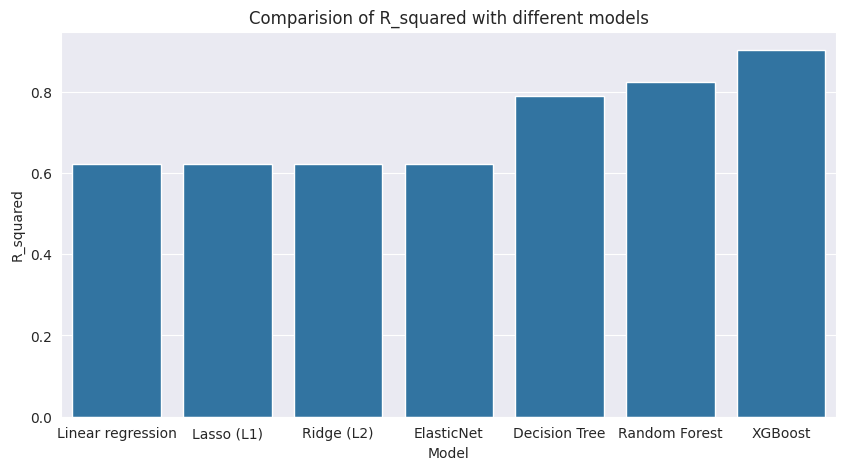

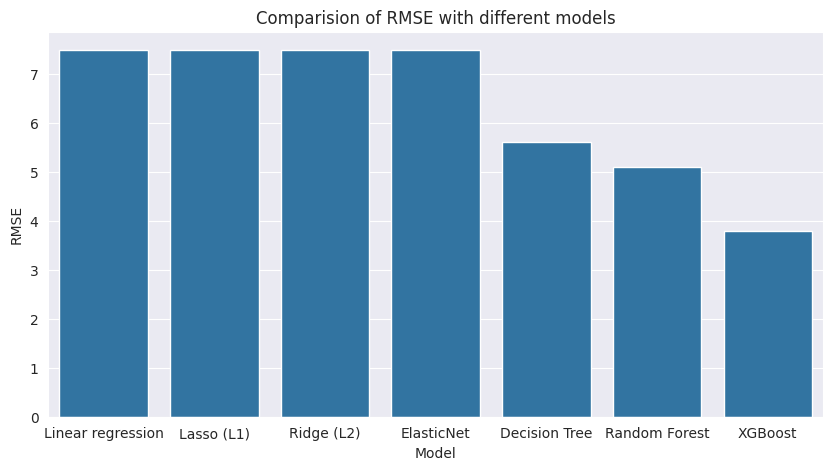

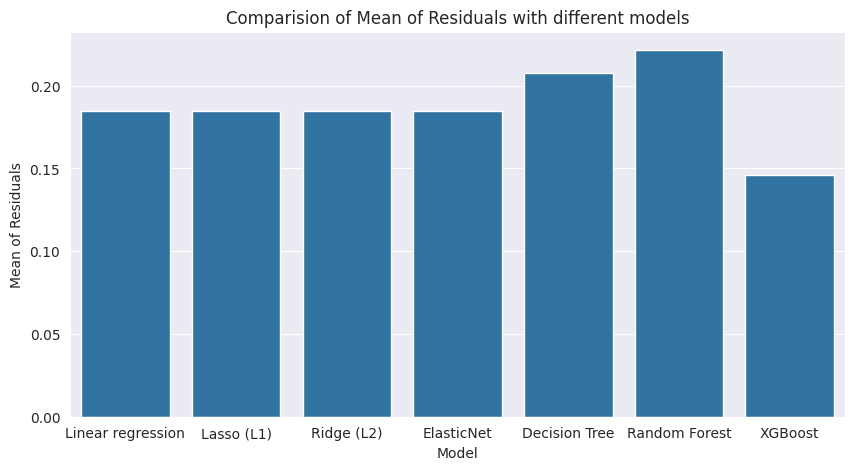

In [ ]:
# Plotting bar plot to compare score and error of each model
for var in ['R_squared','RMSE','Mean of Residuals']:
    plt.figure(figsize=(10,5))
    ax=sns.barplot(x=evaluation_df['Model'],y=evaluation_df[var])
    ax.set_title(f'Comparision of {var} with different models')
    plt.show()

- ***The XGBoost regression model has the highest R-squared score, the lowest Root Mean Squared Error (RMSE), and has very close to having zero mean of residuals.***
- ***Therefore, the XGBoost regression model is the ideal model and well-trained for forecasting the number of rented bikes required per hour based on the model's high accuracy, low error, and zero mean of residuals.***

## **<u>Model Explainability<u>**

### [1] Feature Importance
##### Feature Importance for XGBoost regression model

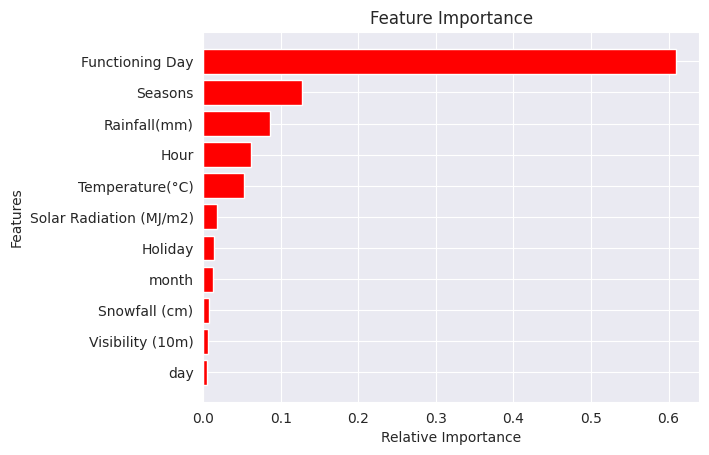

In [ ]:
# Feature Importance for XGBoost regression model

# Create instance for independant features names
features = df[independent_variables].columns
# Creating object of feature importance
importances = xgb_reg.best_estimator_.feature_importances_
indices = np.argsort(importances)

# Plot the graph for important feature
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

- **A higher feature importance score for features : Functioning Days, Rainfall (mm), and Seasons, respectively, indicates that those specific features have a larger influence on the model used to forecast a certain variable, respectively.**

### [2] Model Explainability
##### Model Explainability for XGBoost regression model

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.9 MB/s eta 0:00:00


In [ ]:
# Import shap and other necessary libearies
import shap
import graphviz
from sklearn.tree import export_graphviz
sns.set_style('darkgrid')

PermutationExplainer explainer: 1753it [03:58,  7.35it/s]                          


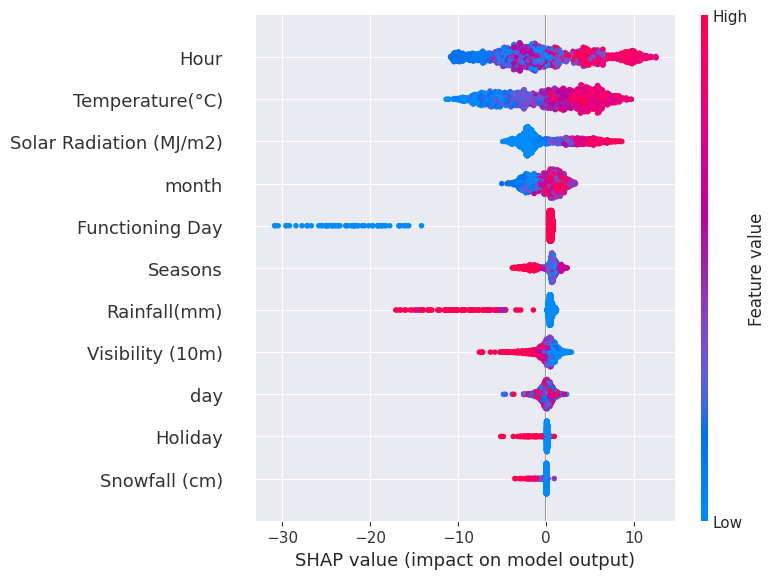

In [ ]:
# Create a SHAP explainer object
explainer = shap.Explainer(xgb_reg.predict, X_test)

# Calculate SHAP values
shap_values1 = explainer(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values1, X_test, feature_names=df[independent_variables].columns)

In [ ]:
shap_values = shap.TreeExplainer(xgb_reg.best_estimator_).shap_values(X_train)

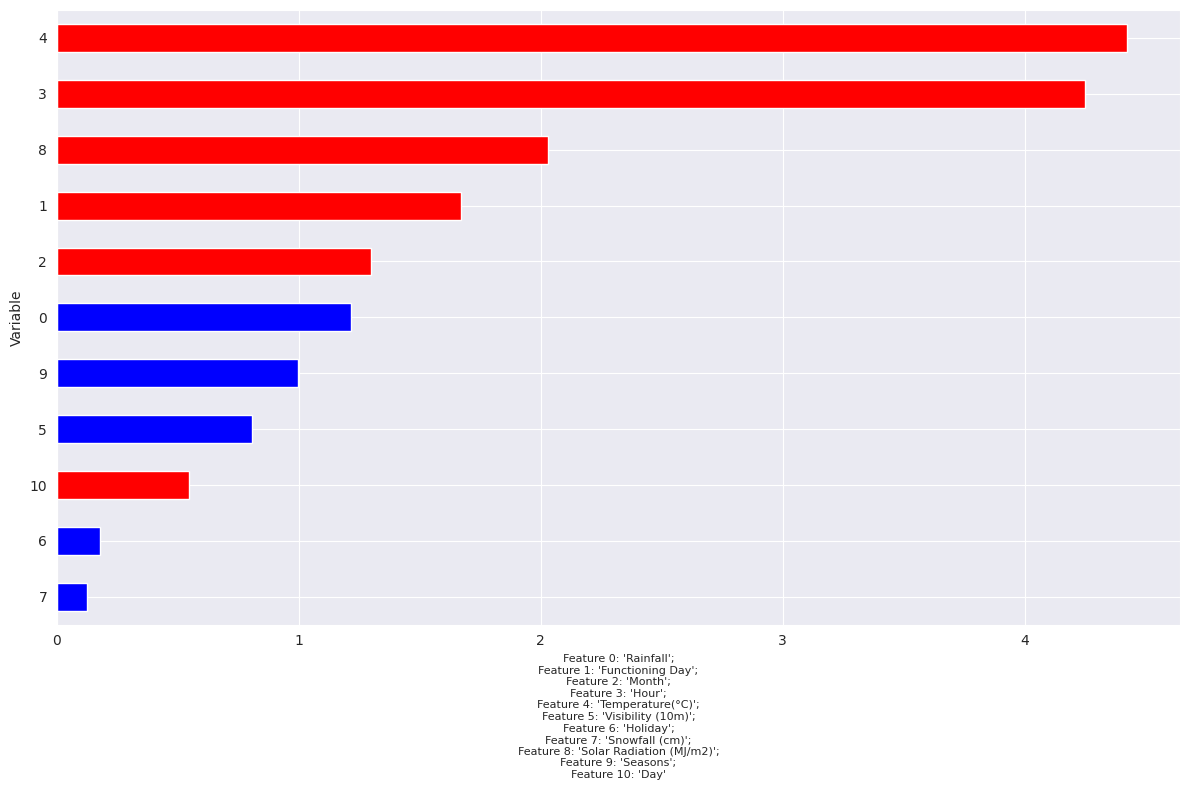

In [ ]:
def ABS_SHAP(df_shap, df):
    # Make a copy of the input data
    shap_v = df_shap.copy()
    feature_list = range(df.shape[1])  # Assuming df is a NumPy array
    df_v = df.copy()

    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[:, i], df_v[:, i])[1][0]
        corr_list.append(b)
    corr_df = pd.DataFrame({'Variable': feature_list, 'Corr': corr_list})
    corr_df['Sign'] = np.where(corr_df['Corr'] > 0, 'red', 'blue')

    # Plot it
    shap_abs = np.abs(shap_v)
    k = pd.DataFrame(shap_abs.mean(axis=0)).reset_index()
    k.columns = ['Variable', 'SHAP_abs']
    k2 = k.merge(corr_df, left_on='Variable', right_on='Variable', how='inner')
    k2 = k2.sort_values(by='SHAP_abs', ascending=True)
    colorlist = k2['Sign']
    fig, ax = plt.subplots(figsize=(12, 8))  # Increase picture size
    k2.plot.barh(x='Variable', y='SHAP_abs', color=colorlist, ax=ax, legend=False)

    # Concatenate feature labels for x-axis
    feature_labels = ["Feature 0: 'Rainfall';", "Feature 1: 'Functioning Day';", "Feature 2: 'Month';",
                      "Feature 3: 'Hour';", "Feature 4: 'Temperature(°C)';", "Feature 5: 'Visibility (10m)';"]
    feature_labels += ["Feature 6: 'Holiday';", "Feature 7: 'Snowfall (cm)';", "Feature 8: 'Solar Radiation (MJ/m2)';"]
    feature_labels += ["Feature 9: 'Seasons';", "Feature 10: 'Day'"]
    ax.set_xlabel("\n".join(feature_labels), fontsize=8)
    plt.tight_layout()
    plt.show()

# Call the modified ABS_SHAP function
ABS_SHAP(shap_values, X_train)


- The model-impacting features (Importance) are listed in descending order.
- For that particular feature, the blue values are low and the red-colored values are high.
- High values from the Hour, Temperature (°C), Solar Radiation (MJ/m2), and Functioning Day features have a positive impact on the model, while low values have a negative impact.
- Values of the variables for Holidays, Snowfall (cm), Visibility (10m), Seasons, and Rainfall (mm) have a negative impact on the model, while low values have a positive impact.

## **<u>Conclusion<u>**

#### **The following observations were made after importing and analyzing the data :**
- Customers favor rental motorcycles equally in all seasons.
- When there are no holidays, customers choose to rent motorcycles. Customers hardly ever use the bikes they rent while travelling on holiday.
- Nearly all consumers preferred to rent bikes during functional hours.
- Bike rentals are popular all month long.
- Renting bicycles was not very popular in 2017, but it increased in 2018.
- At night, customers do not prefer to use rented bikes.
- Customers do not prefer rented bikes in the mornings 4 and 5, but from 7, 8, and 9, the use of rented bikes increases, possibly due to working people going to the office, and it is the same in the evenings 5, 6, and 7, because people are travelling from the office to home. Overall, the rented bike was the most frequently used during office in and out times.
- Customers mostly use rented bikes for transportation in the evening.
- Customers who travel most commonly use rented bikes in the morning at 8 a.m. and in the evening at 6 p.m.
- When the humidity level is between 10% and 18%, people prefer to rent bikes.
- Renting a bike is the best option for customers in dew point temperatures ranging from 12°C to 18°C. The use of a rented bike increases with increasing dew point temperatures, but it still reaches normal dew point temperatures.
- According to the graph, solar radiation has no effect on customer use of rented bikes.
- When it's not raining, people prefer rental bikes the most.
- When there is no snowfall, most people opt to rent bikes. However, the majority of customers prefer to rent bikes when it snows up to 4 cm.
- In the first 10 days of the month, most rented bikes are used by customers. Customers consistently use rented bikes in the last 15 days of the month.
- In June, most rented bikes are used through the year, followed by October. Customers' use of rent bikes is at its peak from April to September.
- The count of rented bikes on that day is unaffected by the day's visibility, but when visibility exceeds 1750, use of rented bikes increases more than usual.
- During the summer and autumn seasons, most people rent bikes. During the winter, fewer people choose to rent bikes.
- Even when there is no holiday other than a holiday, people rent bikes. The use of rented bikes on holidays is lower than on non-holiday days.
- Almost every rented bike is used during its functional hours.

- #### ***The XGBoost regression model has the highest R-squared score, the lowest Root Mean Squared Error (RMSE), and has very close to having zero mean of residuals.***
- #### ***As a result of the model's high accuracy, low error, and zero mean of residuals, the XGBoost regression model is the ideal and well-trained model for forecasting the number of rented bikes required per hour.***